## Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
For many incumbent operators, retaining high profitable customers is the number one business goal.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing data and checking the head count
telecom_df = pd.read_csv('telecom_churn_data.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
telecom_df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [3]:
# Checking the size, data types, description
print(telecom_df.shape)
print(telecom_df.info())
telecom_df.describe()

(99999, 226)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
None


mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [4]:
# checking the null values 
round(100*telecom_df.isnull().sum()/telecom_df.shape[0],2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

## Data Cleaning

In [5]:
# Checking the unique values for columns in telecom_df  
telecom_df.nunique()

mobile_number               99999
circle_id                       1
loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
last_date_of_month_6            1
last_date_of_month_7            1
last_date_of_month_8            1
last_date_of_month_9            1
arpu_6                      85681
arpu_7                      85308
arpu_8                      83615
arpu_9                      79937
onnet_mou_6                 24313
onnet_mou_7                 24336
onnet_mou_8                 24089
onnet_mou_9                 23565
offnet_mou_6                31140
offnet_mou_7                31023
offnet_mou_8                30908
offnet_mou_9                30077
roam_ic_mou_6                6512
roam_ic_mou_7                5230
roam_ic_mou_8                5315
roam_ic_mou_9                4827
roam_og_mou_6                8038
roam_og_mou_7                6639
roam_og_mou_8                6504
roam_og_mou_9                5882
loc_og_t2t_mou

In [6]:
# As we can see many columns have just one unique values and they will not contribute to build the model so we go ahead and drop them.
for i in enumerate(telecom_df.columns):
    if telecom_df[i[1]].nunique() == 1:
        telecom_df.drop(i[1],inplace=True,axis=1)

In [7]:
#Renaming the variables
telecom_df.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

In [8]:
# Function to check the missing values percentage
def missing_percent(val):
    null_cols = round(100*telecom_df.isnull().sum()/telecom_df.shape[0])
    return null_cols.loc[null_cols > val]


In [9]:
#checking the datatypes after applying the datetime format
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 210 entries, mobile_number to vbc_3g_9
dtypes: float64(168), int64(34), object(8)
memory usage: 160.2+ MB


### Handling Missing data

In [10]:
# Checking for the columns which have more than 50% null values 
missing_percent(50)

date_of_last_rech_data_6    75.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
total_rech_data_6           75.0
total_rech_data_7           74.0
total_rech_data_8           74.0
total_rech_data_9           74.0
max_rech_data_6             75.0
max_rech_data_7             74.0
max_rech_data_8             74.0
max_rech_data_9             74.0
count_rech_2g_6             75.0
count_rech_2g_7             74.0
count_rech_2g_8             74.0
count_rech_2g_9             74.0
count_rech_3g_6             75.0
count_rech_3g_7             74.0
count_rech_3g_8             74.0
count_rech_3g_9             74.0
av_rech_amt_data_6          75.0
av_rech_amt_data_7          74.0
av_rech_amt_data_8          74.0
av_rech_amt_data_9          74.0
arpu_3g_6                   75.0
arpu_3g_7                   74.0
arpu_3g_8                   74.0
arpu_3g_9                   74.0
arpu_2g_6                   75.0
arpu_2g_7                   74.0
arpu_2g_8 

As for further evaluation, we can impute the null values in the above columns with 0 excepting the date columns as mentioned below:
['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']

In [11]:
# As dates have the high null value percent and cannot be imputed, so we can drop the below columns 
colmiss_70 = ['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']
telecom_df.drop(colmiss_70,axis=1,inplace=True)

In [12]:
# Imputing the missing values for the required columns
Var_miss_50 = missing_percent(50).index
telecom_df[Var_miss_50] = telecom_df[Var_miss_50].replace(np.nan,0)

In [13]:
# chceking the missing values above 5%
missing_percent(5)

onnet_mou_9         8.0
offnet_mou_9        8.0
roam_ic_mou_9       8.0
roam_og_mou_9       8.0
loc_og_t2t_mou_9    8.0
loc_og_t2m_mou_9    8.0
loc_og_t2f_mou_9    8.0
loc_og_t2c_mou_9    8.0
loc_og_mou_9        8.0
std_og_t2t_mou_9    8.0
std_og_t2m_mou_9    8.0
std_og_t2f_mou_9    8.0
std_og_mou_9        8.0
isd_og_mou_9        8.0
spl_og_mou_9        8.0
og_others_9         8.0
loc_ic_t2t_mou_9    8.0
loc_ic_t2m_mou_9    8.0
loc_ic_t2f_mou_9    8.0
loc_ic_mou_9        8.0
std_ic_t2t_mou_9    8.0
std_ic_t2m_mou_9    8.0
std_ic_t2f_mou_9    8.0
std_ic_mou_9        8.0
spl_ic_mou_9        8.0
isd_ic_mou_9        8.0
ic_others_9         8.0
dtype: float64

In [14]:
# checking if all these above features go missing together since they have the same 8% missing values in each feature.
missingcol = missing_percent(5).index
print ("There are %d customers having missing values for %s together"%(len(telecom_df[telecom_df[missingcol].isnull().all(axis=1)]),missingcol))
telecom_df[telecom_df[missingcol].isnull().all(axis=1)][missingcol].head()

There are 7745 customers having missing values for Index(['onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9',
       'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9',
       'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9',
       'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9'],
      dtype='object') together


onnet_mou_9  offnet_mou_9  roam_ic_mou_9  roam_og_mou_9  loc_og_t2t_mou_9  \
0           NaN           NaN            NaN            NaN               NaN   
7           NaN           NaN            NaN            NaN               NaN   
29          NaN           NaN            NaN            NaN               NaN   
32          NaN           NaN            NaN            NaN               NaN   
35          NaN           NaN            NaN            NaN               NaN   

    loc_og_t2m_mou_9  loc_og_t2f_mou_9  loc_og_t2c_mou_9  loc_og_mou_9  \
0                NaN               NaN               NaN           NaN   
7                NaN               NaN               NaN           NaN   
29               NaN               NaN               NaN           NaN   
32               NaN               NaN               NaN           NaN   
35               NaN               NaN               NaN           NaN   

    std_og_t2t_mou_9  std_og_t2m_mou_9  std_og_t2f_mou_9  std_og_mou_9  \
0                NaN               NaN               NaN           NaN   
7                NaN               NaN               NaN           NaN   
29               NaN               NaN               NaN           NaN   
32               NaN               NaN               NaN           NaN   
35               NaN               NaN               NaN           NaN   

    isd_og_mou_9  spl_og_mou_9  og_others_9  loc_ic_t2t_mou_9  \
0            NaN           NaN          NaN               NaN   
7            NaN           NaN          NaN               NaN   
29           NaN           NaN          NaN               NaN   
32           NaN           NaN          NaN               NaN   
35           NaN           NaN          NaN               NaN   

    loc_ic_t2m_mou_9  loc_ic_t2f_mou_9  loc_ic_mou_9  std_ic_t2t_mou_9  \
0                NaN               NaN           NaN               NaN   
7                NaN               NaN           NaN               NaN   
29               NaN               NaN           NaN               NaN   
32               NaN               NaN           NaN               NaN   
35               NaN               NaN           NaN               NaN   

    std_ic_t2m_mou_9  std_ic_t2f_mou_9  std_ic_mou_9  spl_ic_mou_9  \
0                NaN               NaN           NaN           NaN   
7                NaN               NaN           NaN           NaN   
29               NaN               NaN           NaN           NaN   
32               NaN               NaN           NaN           NaN   
35               NaN               NaN           NaN           NaN   

    isd_ic_mou_9  ic_others_9  
0            NaN          NaN  
7            NaN          NaN  
29           NaN          NaN  
32           NaN          NaN  
35           NaN          NaN

In [15]:
#Imputing the null values of the missingcol columns with the 0
telecom_df[missingcol] = telecom_df[missingcol].replace(np.nan,0)

In [16]:
# checking if any missing value present in the columns above 5%
missing_percent(5)

Series([], dtype: float64)

In [17]:
# chceking the missing values above 2%
missing_percent(2)

onnet_mou_6            4.0
onnet_mou_7            4.0
onnet_mou_8            5.0
offnet_mou_6           4.0
offnet_mou_7           4.0
offnet_mou_8           5.0
roam_ic_mou_6          4.0
roam_ic_mou_7          4.0
roam_ic_mou_8          5.0
roam_og_mou_6          4.0
roam_og_mou_7          4.0
roam_og_mou_8          5.0
loc_og_t2t_mou_6       4.0
loc_og_t2t_mou_7       4.0
loc_og_t2t_mou_8       5.0
loc_og_t2m_mou_6       4.0
loc_og_t2m_mou_7       4.0
loc_og_t2m_mou_8       5.0
loc_og_t2f_mou_6       4.0
loc_og_t2f_mou_7       4.0
loc_og_t2f_mou_8       5.0
loc_og_t2c_mou_6       4.0
loc_og_t2c_mou_7       4.0
loc_og_t2c_mou_8       5.0
loc_og_mou_6           4.0
loc_og_mou_7           4.0
loc_og_mou_8           5.0
std_og_t2t_mou_6       4.0
std_og_t2t_mou_7       4.0
std_og_t2t_mou_8       5.0
std_og_t2m_mou_6       4.0
std_og_t2m_mou_7       4.0
std_og_t2m_mou_8       5.0
std_og_t2f_mou_6       4.0
std_og_t2f_mou_7       4.0
std_og_t2f_mou_8       5.0
std_og_mou_6           4.0
s

In [18]:
# checking if all these above features go missing together since they have the same missing values in most of the features.
missingcol_1 = missing_percent(2).index
print ("There are %d customers having missing values for %s together"%(len(telecom_df[telecom_df[missingcol_1].isnull().all(axis=1)]),missingcol_1))
telecom_df[telecom_df[missingcol_1].isnull().all(axis=1)][missingcol_1].head()

There are 381 customers having missing values for Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6',
       'og_others_7', 'og_others_8', 

onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
202           NaN          NaN          NaN           NaN           NaN   
275           NaN          NaN          NaN           NaN           NaN   
687           NaN          NaN          NaN           NaN           NaN   
1206          NaN          NaN          NaN           NaN           NaN   
1232          NaN          NaN          NaN           NaN           NaN   

      offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
202            NaN            NaN            NaN            NaN   
275            NaN            NaN            NaN            NaN   
687            NaN            NaN            NaN            NaN   
1206           NaN            NaN            NaN            NaN   
1232           NaN            NaN            NaN            NaN   

      roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
202             NaN            NaN            NaN               NaN   
275             NaN            NaN            NaN               NaN   
687             NaN            NaN            NaN               NaN   
1206            NaN            NaN            NaN               NaN   
1232            NaN            NaN            NaN               NaN   

      loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
202                NaN               NaN               NaN               NaN   
275                NaN               NaN               NaN               NaN   
687                NaN               NaN               NaN               NaN   
1206               NaN               NaN               NaN               NaN   
1232               NaN               NaN               NaN               NaN   

      loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
202                NaN               NaN               NaN               NaN   
275                NaN               NaN               NaN               NaN   
687                NaN               NaN               NaN               NaN   
1206               NaN               NaN               NaN               NaN   
1232               NaN               NaN               NaN               NaN   

      loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
202                NaN               NaN               NaN           NaN   
275                NaN               NaN               NaN           NaN   
687                NaN               NaN               NaN           NaN   
1206               NaN               NaN               NaN           NaN   
1232               NaN               NaN               NaN           NaN   

      loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
202            NaN           NaN               NaN               NaN   
275            NaN           NaN               NaN               NaN   
687            NaN           NaN               NaN               NaN   
1206           NaN           NaN               NaN               NaN   
1232           NaN           NaN               NaN               NaN   

      std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
202                NaN               NaN               NaN               NaN   
275                NaN               NaN               NaN               NaN   
687                NaN               NaN               NaN               NaN   
1206               NaN               NaN               NaN               NaN   
1232               NaN               NaN               NaN               NaN   

      std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  \
202                NaN               NaN               NaN           NaN   
275                NaN               NaN               NaN           NaN   
687                NaN               NaN               NaN           NaN   
1206               NaN               NaN               NaN           NaN   
1232        

In [19]:
# dropping the 381 rows as all of the above properties are null and they would not contribute much to the model building process  
telecom_df = telecom_df[~telecom_df[missingcol_1].isnull().all(axis=1)]

In [20]:
#Imputing the null values of the missingcol columns with the 0
telecom_df[missingcol_1] = telecom_df[missingcol_1].replace(np.nan,0)

In [21]:
# Checking the shape of the dataframe
telecom_df.shape

(99618, 206)

In [22]:
# checking the missing values above 0%
missing_percent(0)

date_of_last_rech_6    1.0
date_of_last_rech_7    1.0
dtype: float64

In [23]:
# Checking if any row contains all null values for the above listed columns
missingcol_2 = missing_percent(0).index
telecom_df[telecom_df[missingcol_2].isnull().all(axis=1)][missingcol_2].head()

date_of_last_rech_6 date_of_last_rech_7
232                  NaN                 NaN
279                  NaN                 NaN
1189                 NaN                 NaN
2104                 NaN                 NaN
3892                 NaN                 NaN

In [24]:
# Checking the value counts of date_of_last_rech_7
telecom_df['date_of_last_rech_7'].value_counts(normalize=True)

7/31/2014    0.176126
7/30/2014    0.141182
7/25/2014    0.095765
7/29/2014    0.092220
7/28/2014    0.076367
7/27/2014    0.060199
7/26/2014    0.054769
7/24/2014    0.040731
7/19/2014    0.031144
7/22/2014    0.030247
7/20/2014    0.029463
7/17/2014    0.027884
7/16/2014    0.025031
7/23/2014    0.023381
7/21/2014    0.016698
7/15/2014    0.015811
7/18/2014    0.013040
7/10/2014    0.008741
7/9/2014     0.008385
7/12/2014    0.007427
7/14/2014    0.004493
7/11/2014    0.004157
7/13/2014    0.003301
7/6/2014     0.003189
7/4/2014     0.002557
7/8/2014     0.001987
7/7/2014     0.001559
7/3/2014     0.001487
7/5/2014     0.001273
7/1/2014     0.000754
7/2/2014     0.000632
Name: date_of_last_rech_7, dtype: float64

In [25]:
# Imputing the null values with the last date of the month
telecom_df['date_of_last_rech_6'] = telecom_df['date_of_last_rech_6'].replace(np.nan,telecom_df['date_of_last_rech_6'].mode()[0])
telecom_df['date_of_last_rech_7'] = telecom_df['date_of_last_rech_7'].replace(np.nan,telecom_df['date_of_last_rech_7'].mode()[0])

In [26]:
# Checking if there are any null values
missing_percent(0)

Series([], dtype: float64)

In [27]:
#Converting the object values to Datetime datatype format
telecom_df.drop(telecom_df.select_dtypes(include='object'),axis=1,inplace=True)

In [28]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99618 entries, 0 to 99998
Columns: 202 entries, mobile_number to vbc_3g_9
dtypes: float64(168), int64(34)
memory usage: 154.3 MB


#### As we see above, there are no more null values present in the dataframe

In [29]:
# list of all columns which store date
date_columns = list(telecom_df.filter(regex='date').columns)
date_columns

[]

## Derive new variables

In [30]:
# As we have data for 2g recharge count and 3g recharge count, 
# we can create a new variable by summing these 2 variables to give us total number of data recharges
for i in range(6,10):
    telecom_df['total_num_data_rech_'+str(i)] = (telecom_df['count_rech_2g_'+str(i)]+telecom_df['count_rech_3g_'+str(i)]).astype(int)

## High Value Customers

In [31]:
# let's add new column total recharge amount for data: total_rech_amt_data for calculating High Value customer process
# Calculating total data recharge amount
telecom_df['total_rech_amt_data_6'] = telecom_df.av_rech_amt_data_6 * telecom_df.total_rech_data_6
telecom_df['total_rech_amt_data_7'] = telecom_df.av_rech_amt_data_7 * telecom_df.total_rech_data_7
telecom_df['total_rech_amt_data_8'] = telecom_df.av_rech_amt_data_8 * telecom_df.total_rech_data_8

In [32]:
# Calculate total data recharge amount in 6&7 month
telecom_df['total_rech_amt_data_6_7'] = telecom_df['total_rech_amt_data_6']+telecom_df['total_rech_amt_data_7']

In [33]:
# Calculating total recharge amount by adding call recharge amt and data recharge amt
telecom_df['total_rechar_amt_6'] = telecom_df['total_rech_amt_6'] + telecom_df['total_rech_amt_data_6'] 
telecom_df['total_rechar_amt_7'] = telecom_df['total_rech_amt_7'] + telecom_df['total_rech_amt_data_7'] 

# Calculating avg recharge done by customer in June and July
avg_rech_amt_6_7 = (telecom_df['total_rech_amt_6']+telecom_df['total_rech_amt_7'])/2

In [34]:
# Looking at the 70th percentile recharge amt 
Cust_HV_70 = np.percentile(avg_rech_amt_6_7,70)
# Filtering the users whose good phase avg. recharge amount >= to the cutoff of 70th percentile.
df_high_val_cust = telecom_df[avg_rech_amt_6_7 >= Cust_HV_70]

In [35]:
# Checking the High Value customer data frame 
df_high_val_cust.head()

mobile_number    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
7      7000701601  1069.180  1349.850  3171.480  500.000        57.84   
8      7001524846   378.721   492.223   137.362  166.787       413.69   
13     7002191713   492.846   205.671   593.260  322.732       501.76   
16     7000875565   430.975   299.869   187.894  206.490        50.51   
17     7000187447   690.008    18.980    25.499  257.583      1185.91   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
7         54.68        52.29         0.00        453.43        567.16   
8        351.03        35.08        33.46         94.66         80.63   
13       108.39       534.24       244.81        413.31        119.28   
16        74.01        70.61        31.34        296.29        229.74   
17         9.28         7.79       558.51         61.64          0.00   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
7         325.91          0.00          16.23          33.49          31.64   
8         136.48        108.71           0.00           0.00           0.00   
13        482.46        214.06          23.53         144.24          72.11   
16        162.76        224.39           0.00           2.83           0.00   
17          5.54         87.89           0.00           4.76           4.81   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
7            0.00          23.74          12.59          38.06           0.00   
8            0.00           0.00           0.00           0.00           0.00   
13         136.78           7.98          35.26           1.44          12.78   
16           0.00           0.00          17.74           0.00           0.00   
17           0.00           0.00           8.46          13.34          17.98   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
7              51.39             31.38             40.28              0.00   
8             297.13            217.59             12.49             26.13   
13             49.63              6.19             36.01              6.14   
16             42.61             65.16             67.38             26.88   
17             38.99              0.00              0.00             36.41   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
7             308.63            447.38            162.28              0.00   
8              80.96             70.58             50.54             34.58   
13            151.13             47.28            294.46            108.24   
16            273.29            145.99            128.28            201.49   
17             58.54              0.00              0.00              9.38   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
7              62.13             55.14             53.23              0.00   
8               0.00              0.00              0.00              0.00   
13              4.54              0.00             23.51              5.29   
16              0.00              4.48             10.26              4.66   
17              0.00              0.00              0.00              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
7                0.0               0.0              0.00               0.0   
8                0.0               0.0              7.15               0.0   
13               0.0               0.0              0.49               0.0   
16               0.0               0.0              0.00               0.0   
17               0.0               0.0              0.00               0.0   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
7         422.16        533.91        255.79          0.00              4.30   
8         378.09        288.18         63.04         60.71            116.56   
13        205.31         53.48        353.99    

## Deriving Churn

As per our analysis, the below variables defines if the customer churns or not,
If all the below mentioned columns in the dataframe are `0` then it shows no activity from the customer end. 
Hence we can conclude that the customer has churned
- vol_2g_mb_9
- vol_3g_mb_9
- total_ic_mou_9
- total_og_mou_9

In [36]:
# Checking the churn features for each customer 
churn_features = ['vol_2g_mb_9','vol_3g_mb_9','total_ic_mou_9','total_og_mou_9']
print(df_high_val_cust[churn_features])

       vol_2g_mb_9  vol_3g_mb_9  total_ic_mou_9  total_og_mou_9
7             0.00         0.00            0.00            0.00
8             0.00         0.00           34.91          142.18
13            0.00         0.00          631.86          446.09
16            0.00         0.00          334.56          255.74
17            0.00         0.00           87.13          631.08
21            0.00         0.00          252.61         1031.53
24            0.00         0.00          330.03          627.78
33           30.92      5588.11          114.16            1.70
38            0.00         0.00          114.09          708.04
41            0.00         0.00          165.84           89.13
48            0.00         0.00          894.81         2319.01
53            0.82         0.00          680.61          503.06
56          137.12       835.99          225.34          127.48
57           22.05      4305.54         1047.41          326.29
60            0.00         0.00         

In [37]:
# Assigning churn value to each customer on the basis of churn features
flag = ~df_high_val_cust[churn_features].any(axis=1)
df_high_val_cust['churn'] = flag.map({True:1, False:0})
df_high_val_cust.head()

mobile_number    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
7      7000701601  1069.180  1349.850  3171.480  500.000        57.84   
8      7001524846   378.721   492.223   137.362  166.787       413.69   
13     7002191713   492.846   205.671   593.260  322.732       501.76   
16     7000875565   430.975   299.869   187.894  206.490        50.51   
17     7000187447   690.008    18.980    25.499  257.583      1185.91   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
7         54.68        52.29         0.00        453.43        567.16   
8        351.03        35.08        33.46         94.66         80.63   
13       108.39       534.24       244.81        413.31        119.28   
16        74.01        70.61        31.34        296.29        229.74   
17         9.28         7.79       558.51         61.64          0.00   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
7         325.91          0.00          16.23          33.49          31.64   
8         136.48        108.71           0.00           0.00           0.00   
13        482.46        214.06          23.53         144.24          72.11   
16        162.76        224.39           0.00           2.83           0.00   
17          5.54         87.89           0.00           4.76           4.81   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
7            0.00          23.74          12.59          38.06           0.00   
8            0.00           0.00           0.00           0.00           0.00   
13         136.78           7.98          35.26           1.44          12.78   
16           0.00           0.00          17.74           0.00           0.00   
17           0.00           0.00           8.46          13.34          17.98   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
7              51.39             31.38             40.28              0.00   
8             297.13            217.59             12.49             26.13   
13             49.63              6.19             36.01              6.14   
16             42.61             65.16             67.38             26.88   
17             38.99              0.00              0.00             36.41   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
7             308.63            447.38            162.28              0.00   
8              80.96             70.58             50.54             34.58   
13            151.13             47.28            294.46            108.24   
16            273.29            145.99            128.28            201.49   
17             58.54              0.00              0.00              9.38   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
7              62.13             55.14             53.23              0.00   
8               0.00              0.00              0.00              0.00   
13              4.54              0.00             23.51              5.29   
16              0.00              4.48             10.26              4.66   
17              0.00              0.00              0.00              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
7                0.0               0.0              0.00               0.0   
8                0.0               0.0              7.15               0.0   
13               0.0               0.0              0.49               0.0   
16               0.0               0.0              0.00               0.0   
17               0.0               0.0              0.00               0.0   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
7         422.16        533.91        255.79          0.00              4.30   
8         378.09        288.18         63.04         60.71            116.56   
13        205.31         53.48        353.99    

`So churn value of 0 signifies that the customer has not yet churned  whereas a churn value of 1 indicates that the customer has churned` 

In [38]:
# Calculating the churn percentage
round(100*df_high_val_cust.churn.sum()/df_high_val_cust.shape[0],2)

8.6

`So from the above line, we got to know that 8.6% customers have churned`

In [39]:
# Dropping the churn month columns from the High value customer dataframe
df_high_val_cust = df_high_val_cust.drop(df_high_val_cust.loc[:,df_high_val_cust.columns.str.endswith("_9")],axis=1)
df_high_val_cust.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
13     7002191713   492.846   205.671   593.260       501.76       108.39   
16     7000875565   430.975   299.869   187.894        50.51        74.01   
17     7000187447   690.008    18.980    25.499      1185.91         9.28   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
7         52.29        453.43        567.16        325.91          16.23   
8         35.08         94.66         80.63        136.48           0.00   
13       534.24        413.31        119.28        482.46          23.53   
16        70.61        296.29        229.74        162.76           0.00   
17         7.79         61.64          0.00          5.54           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           33.49          31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00           0.00   
13         144.24          72.11           7.98          35.26           1.44   
16           2.83           0.00           0.00          17.74           0.00   
17           4.76           4.81           0.00           8.46          13.34   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
13             23.51               0.0               0.0              0.49   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
13        205.31         53.48        353.99            446.41   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
13            156.94              0.00              0.00              0.00   
16          

## EDA

In [40]:
# Checking all the features which are skewed 
Cont_vars = df_high_val_cust.select_dtypes(exclude='object')

for i in Cont_vars:
    if df_high_val_cust[i].nunique()<20:
        print('___________________________________________________')
        print(i)
        print(df_high_val_cust[i].value_counts(normalize=True))
        print('___________________________________________________')

___________________________________________________
night_pck_user_6
0.0    0.989596
1.0    0.010404
Name: night_pck_user_6, dtype: float64
___________________________________________________
___________________________________________________
night_pck_user_7
0.0    0.990097
1.0    0.009903
Name: night_pck_user_7, dtype: float64
___________________________________________________
___________________________________________________
night_pck_user_8
0.0    0.990666
1.0    0.009334
Name: night_pck_user_8, dtype: float64
___________________________________________________
___________________________________________________
monthly_2g_6
0    0.889064
1    0.098324
2    0.011508
3    0.000870
4    0.000234
Name: monthly_2g_6, dtype: float64
___________________________________________________
___________________________________________________
monthly_2g_7
0    0.884949
1    0.100298
2    0.013549
3    0.000970
4    0.000167
5    0.000067
Name: monthly_2g_7, dtype: float64
__________________

In [41]:
# As we see the 9 columns are highly skewed, we go ahead and drop them 

print('Before deleting the skewed columns, shape of the data frame is {0}'.format(df_high_val_cust.shape))

Skewed_vars = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','monthly_3g_6','monthly_3g_7','monthly_3g_8','monthly_2g_6','monthly_2g_7','monthly_2g_8']
df_high_val_cust.drop(Skewed_vars,axis=1,inplace=True)

print('After deleting the skewed columns, shape of the data frame is {0}'.format(df_high_val_cust.shape))

Before deleting the skewed columns, shape of the data frame is (29891, 162)
After deleting the skewed columns, shape of the data frame is (29891, 153)


In [42]:
# we are dropping the mobile numberas it will not contribute in model building
#df_high_val_cust.drop('mobile_number',axis=1,inplace=True)
df_high_val_cust.set_index('mobile_number',inplace=True)

In [43]:
# Performing the describe method on data frame 
df_high_val_cust.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  29891.000000  29891.000000  29891.000000  29891.000000  29891.000000   
mean     587.881483    590.377689    535.903334    296.795071    305.055824   
std      442.417903    463.322079    492.811385    461.449943    482.411914   
min    -2258.709000  -2014.045000   -945.808000      0.000000      0.000000   
25%      364.813000    366.262000    290.794000     41.310000     41.190000   
50%      496.388000    494.715000    452.935000    126.180000    125.830000   
75%      704.636000    701.981500    672.110500    354.470000    361.060000   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  29891.000000  29891.000000  29891.000000  29891.000000   29891.000000   
mean     268.194687    418.959698    424.959156    375.868039      17.460038   
std      467.194566    471.151216    487.126571    478.079844      79.300001   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%       27.160000    137.810000    136.150000     96.185000       0.000000   
50%       99.830000    283.210000    283.010000    241.790000       0.000000   
75%      298.695000    524.775000    534.210000    483.945000       0.000000   
max    10752.560000   8362.360000   9667.130000  14007.340000    2613.310000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   29891.000000   29891.000000   29891.000000   29891.000000   
mean       13.567979      13.292832      29.411217      22.104589   
std        76.450169      74.692181     118.790601      98.103411   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      3813.290000    4169.810000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   29891.000000      29891.000000      29891.000000      29891.000000   
mean       21.527747         94.900833         95.945685         87.299628   
std       106.440539        237.271882        248.541211        235.071738   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          8.340000          9.160000          5.790000   
50%         0.000000         32.640000         33.260000         28.760000   
75%         0.000000         91.800000         91.750000         84.800000   
max      5337.040000       6431.330000       7400.660000      10752.560000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      29891.000000      29891.000000      29891.000000      29891.000000   
mean         181.658521        181.649447        167.898095          6.989725   
std          250.475171        241.058455        235.063734         22.700180   
min            0.000000          0.000000          0.000000          0.000000   
25%           30.430000         33.730000         22.500000          0.000000   
50%          101.680000        104.630000         90.210000          0.330000   
75%          240.560000        239.830000        224.205000          5.095000   
max         4729.740000       4557.140000       4961.330000       1466.030000   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count      29891.000000      29891.000000      29891.000000      29891.000000   
mean           7.114018          6.507364          1.569538          1.864493   
std           22.627976         20.254512          6.898995          9.269051   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.400000          0.1800

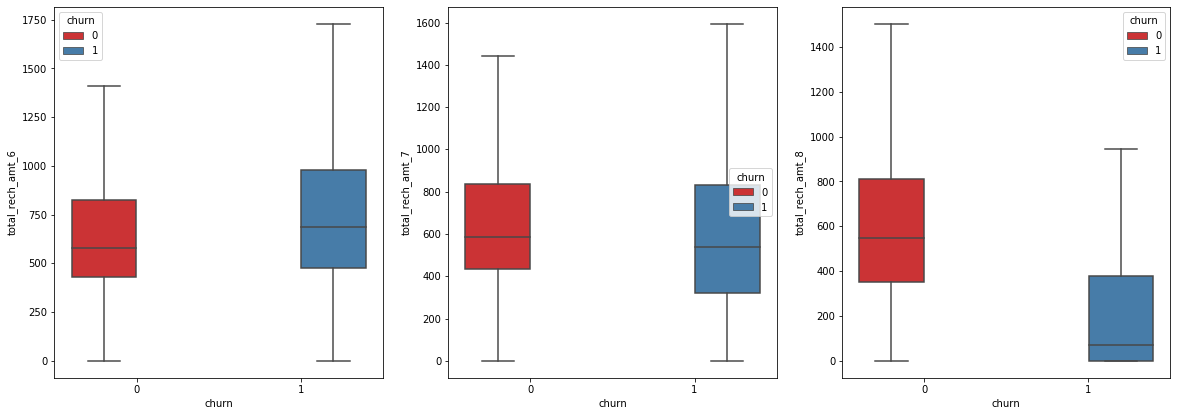

In [44]:
# Plotting for total recharge amount:

plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
sns.boxplot(data=df_high_val_cust, y="total_rech_amt_6",x="churn",hue="churn",
            showfliers=False,palette=("Set1"))
plt.subplot(2,3,2)
sns.boxplot(data=df_high_val_cust, y="total_rech_amt_7",x="churn",hue="churn",
            showfliers=False,palette=("Set1"))
plt.subplot(2,3,3)
sns.boxplot(data=df_high_val_cust, y="total_rech_amt_8",x="churn",hue="churn",
            showfliers=False,palette=("Set1"))
plt.show()

#### As we see the total recharge amount observed in Good phase is gradually decreasing in the Action phase

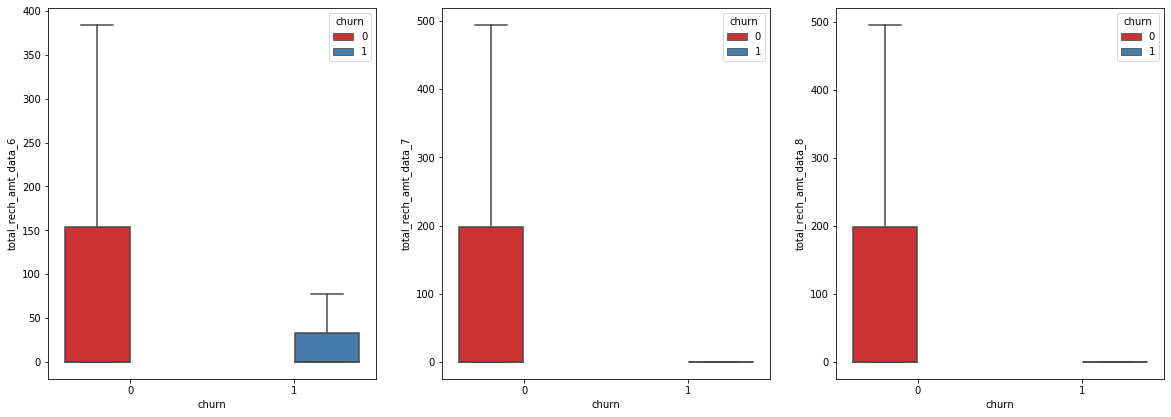

In [45]:
# Ploting for total recharge amount:

plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
sns.boxplot(data=df_high_val_cust, y="total_rech_amt_data_6",x="churn",hue="churn",
            showfliers=False,palette=("Set1"))
plt.subplot(2,3,2)
sns.boxplot(data=df_high_val_cust, y="total_rech_amt_data_7",x="churn",hue="churn",
            showfliers=False,palette=("Set1"))
plt.subplot(2,3,3)
sns.boxplot(data=df_high_val_cust, y="total_rech_amt_data_8",x="churn",hue="churn",
            showfliers=False,palette=("Set1"))
plt.show()

#### As we see the total data recharge amount in churn case is drops in the action phase 

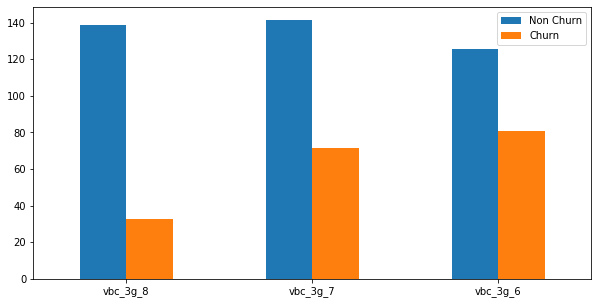

In [46]:
# volume based cost
vbc_3g_data = ['vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6']

df_0 = df_high_val_cust[df_high_val_cust.churn==0].filter(vbc_3g_data)
df_1 = df_high_val_cust[df_high_val_cust.churn==1].filter(vbc_3g_data)

mean_df_0 = pd.DataFrame([df_0.mean()],index={'Non Churn'})
mean_df_1 = pd.DataFrame([df_1.mean()],index={'Churn'})

frames = [mean_df_0, mean_df_1]
mean_bar = pd.concat(frames)

mean_bar.T.plot.bar(figsize=(10,5),rot=0)
plt.show()


#### Significantly it showing that volume based cost for 3G is much lower for Churned customers as compared to Non-Churned Customers and also there is a drop in vbc in 8th month

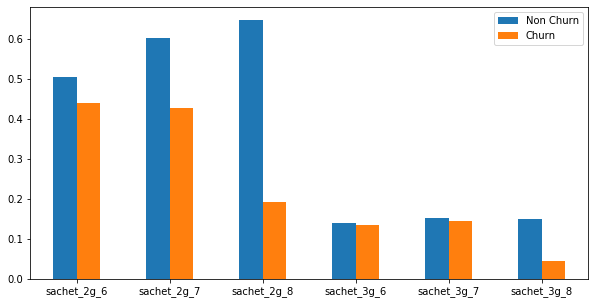

In [47]:
# Service schemes with validity less than a month
sc_2g_3g_data = ['sachet_2g_6','sachet_2g_7','sachet_2g_8','sachet_3g_6','sachet_3g_7','sachet_3g_8']

df_0 = df_high_val_cust[df_high_val_cust.churn==0].filter(sc_2g_3g_data)
df_1 = df_high_val_cust[df_high_val_cust.churn==1].filter(sc_2g_3g_data)

mean_df_0 = pd.DataFrame([df_0.mean()],index={'Non Churn'})
mean_df_1 = pd.DataFrame([df_1.mean()],index={'Churn'})

frames = [mean_df_0, mean_df_1]
mean_bar = pd.concat(frames)

mean_bar.T.plot.bar(figsize=(10,5),rot=0)
plt.show()


#### Sachet schemes for 2g available for 6,7 and 8th month are comparatively higher than sachet schemes for 3g
#### We see a drop in the sachet schemes for 2g and 3g for churned users in the 8th month

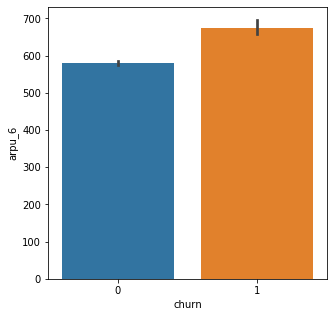

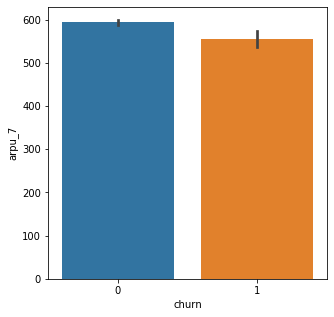

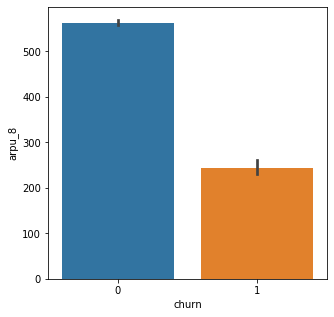

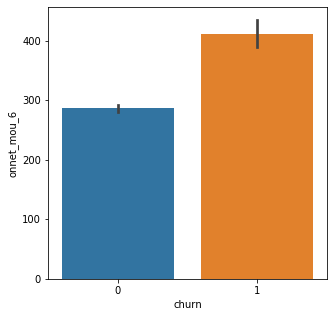

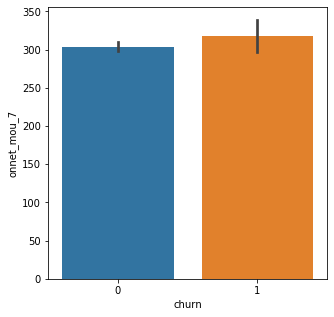

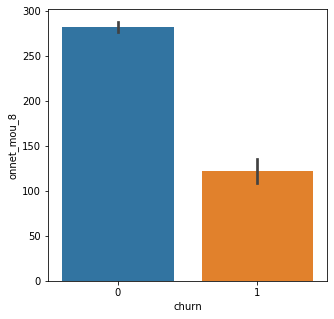

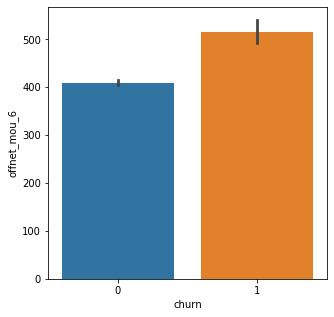

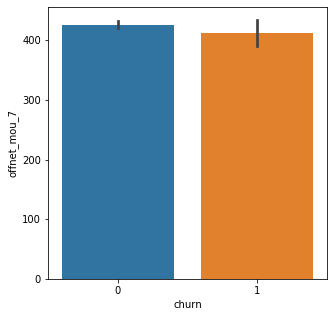

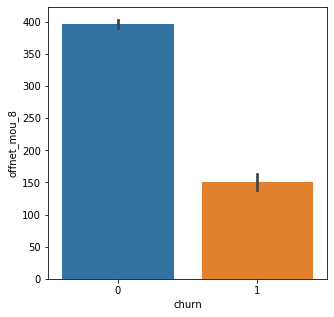

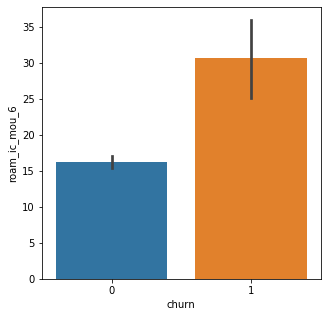

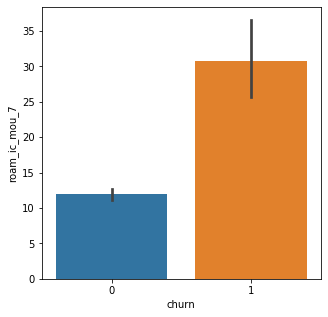

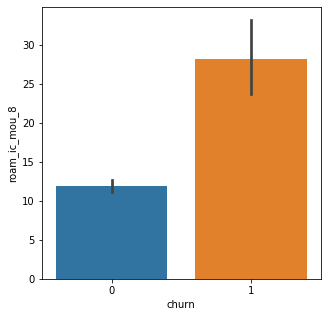

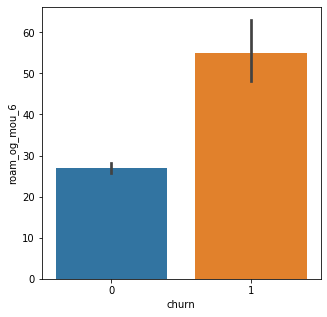

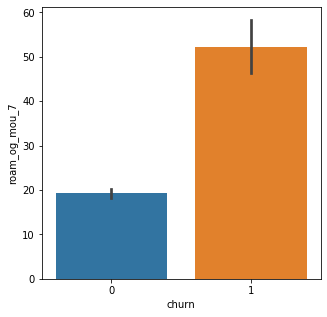

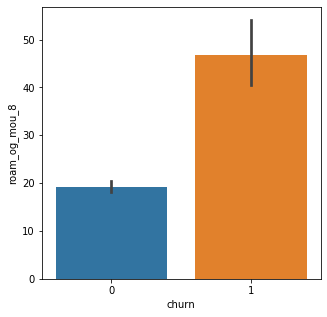

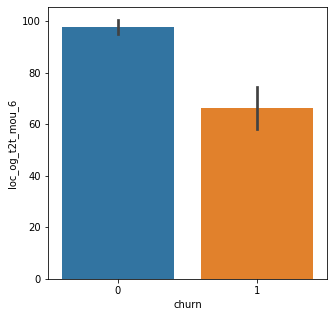

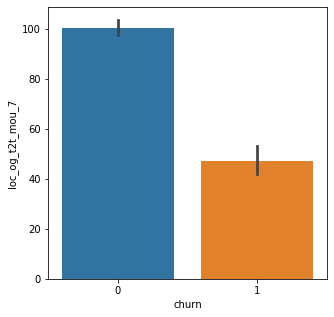

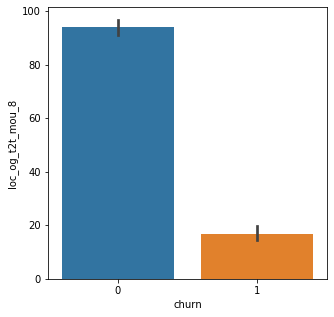

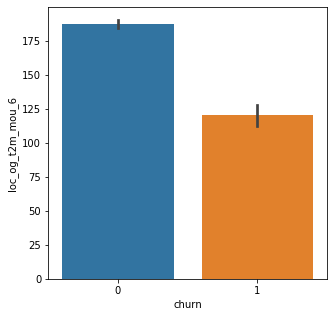

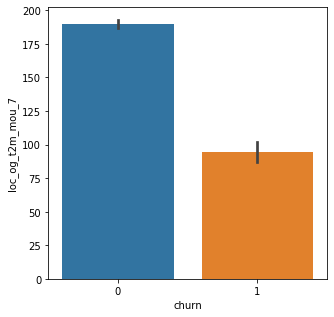

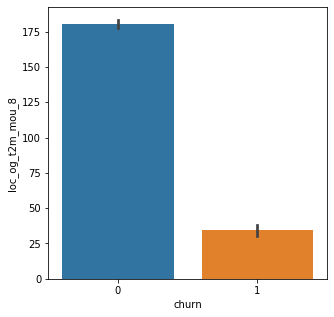

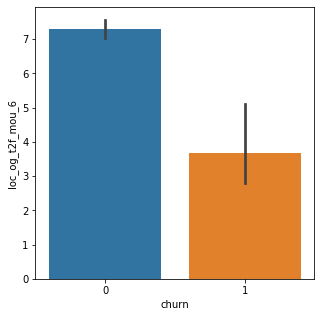

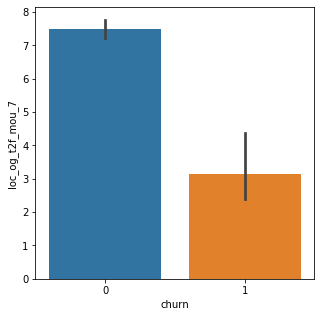

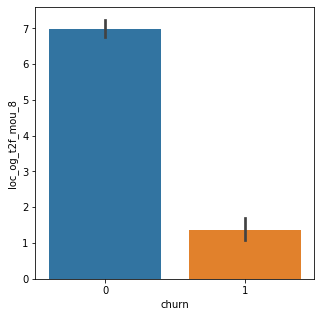

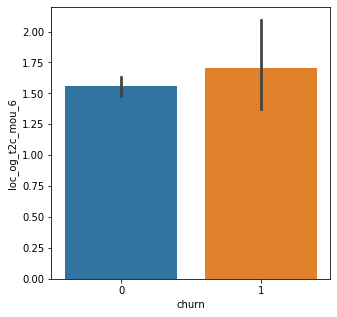

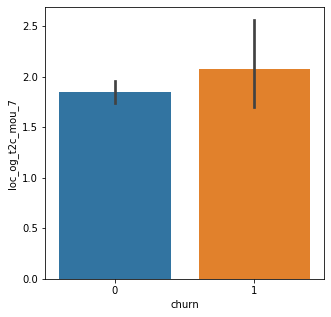

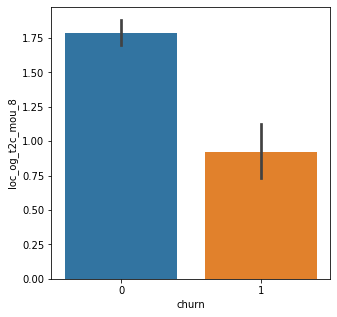

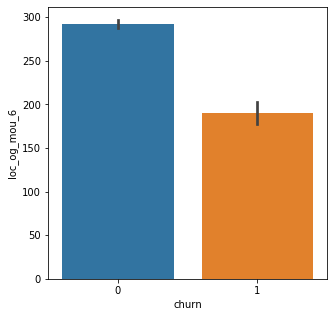

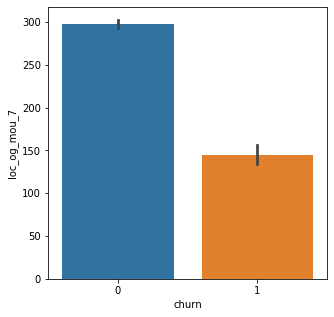

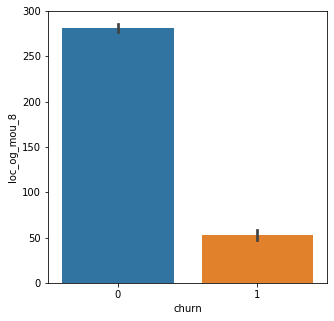

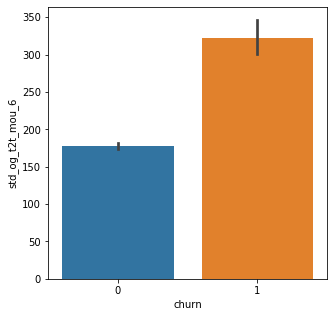

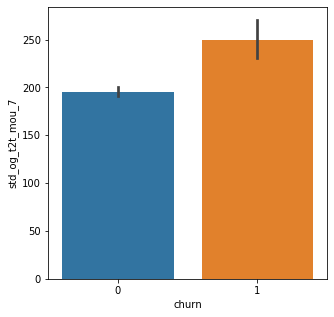

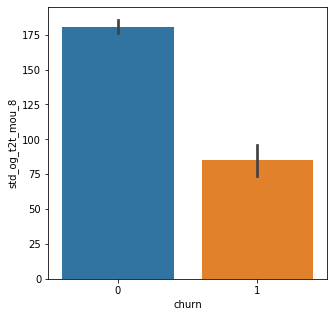

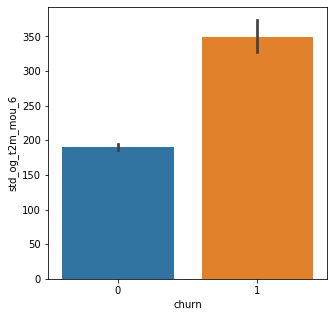

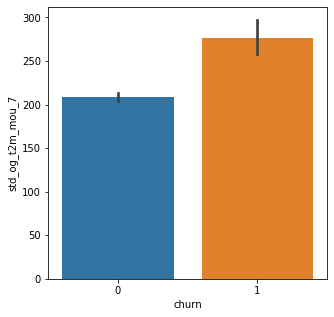

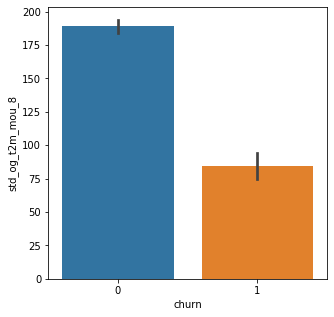

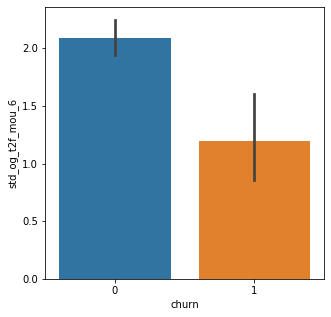

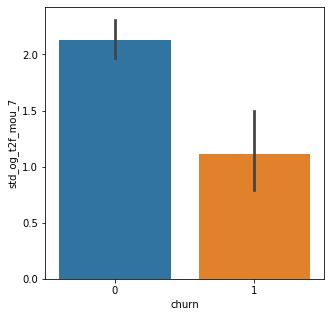

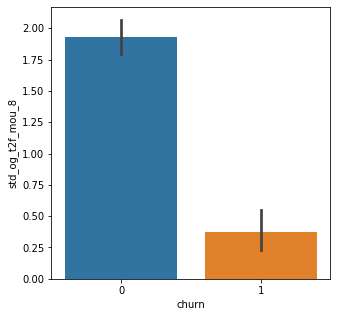

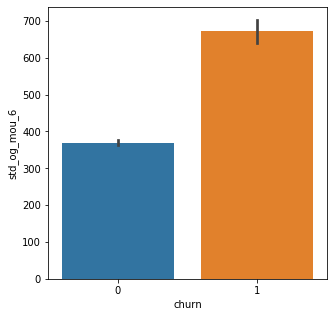

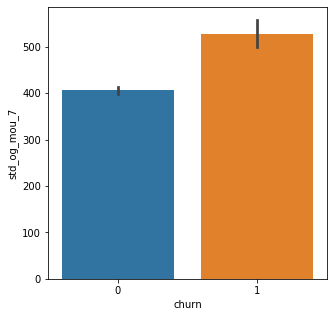

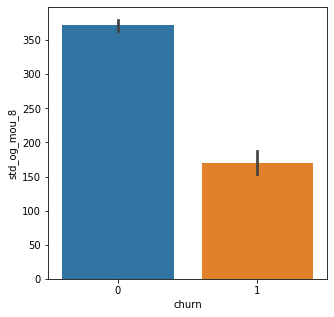

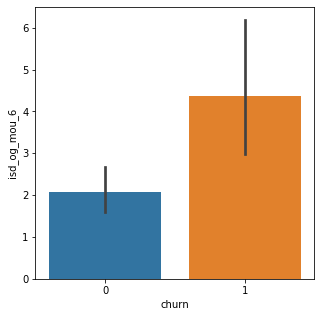

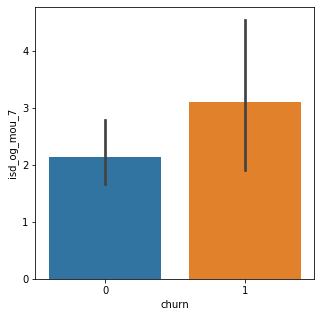

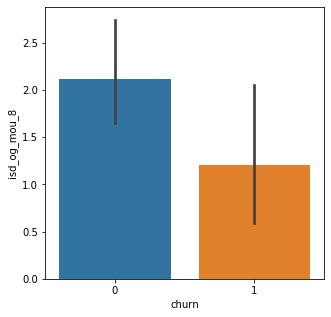

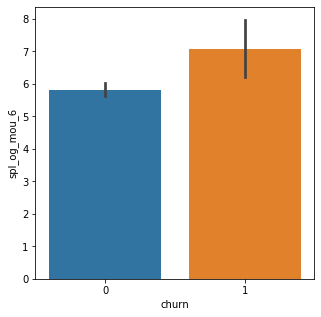

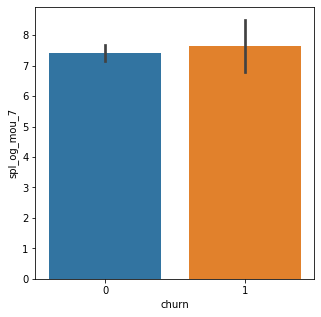

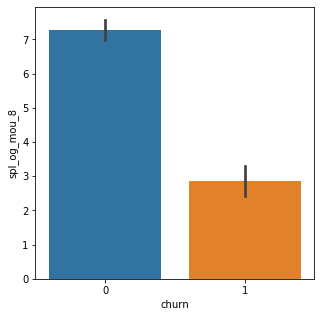

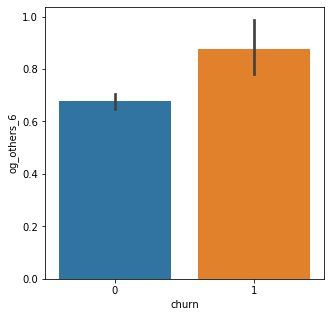

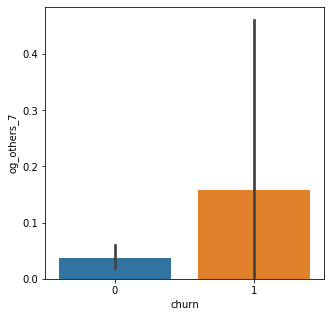

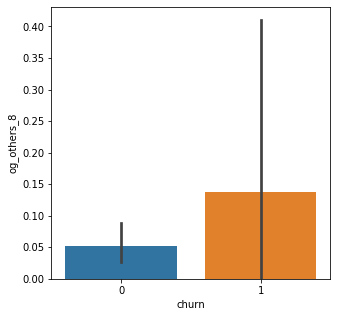

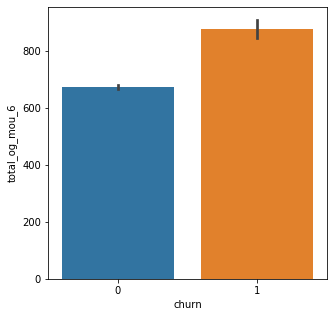

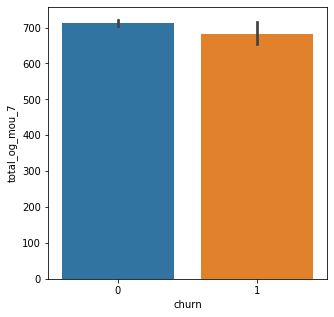

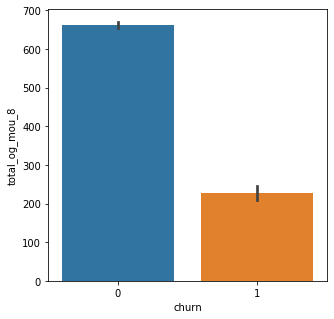

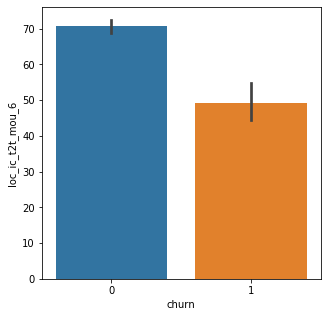

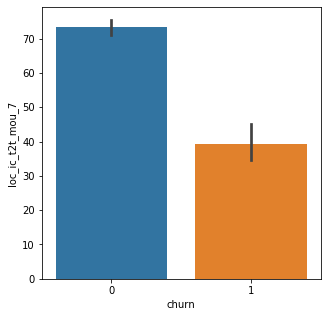

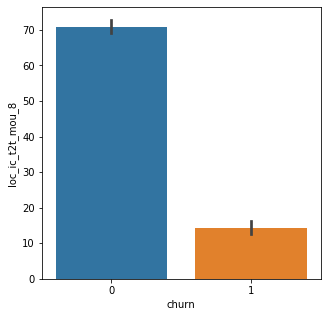

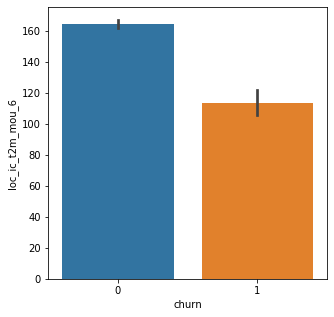

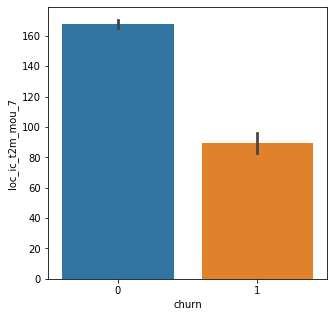

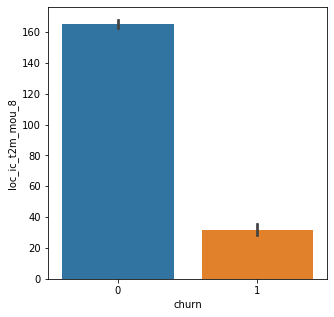

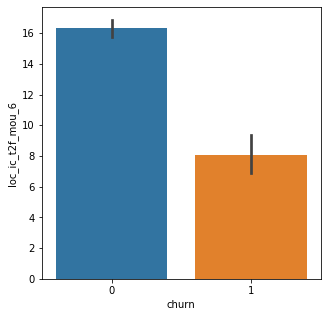

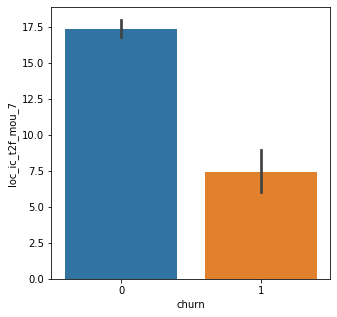

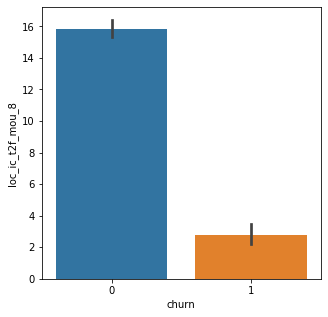

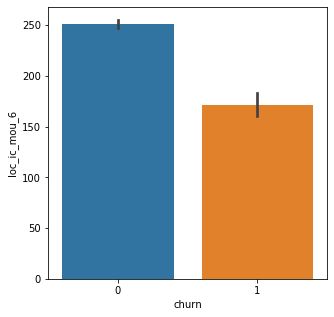

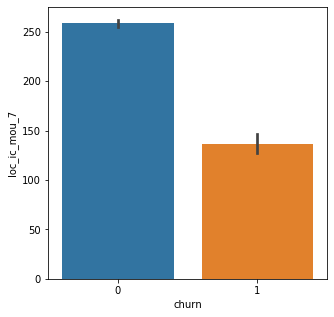

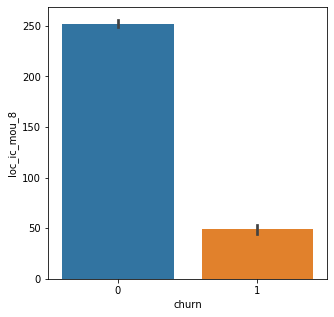

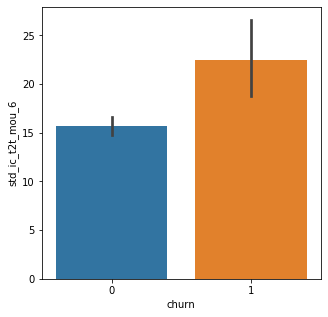

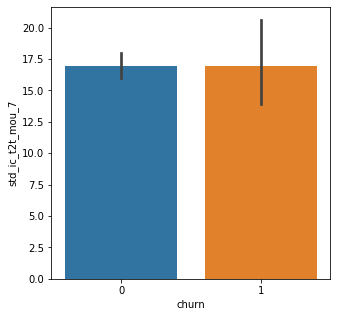

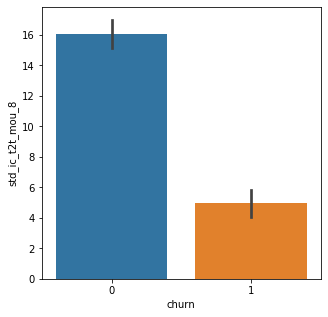

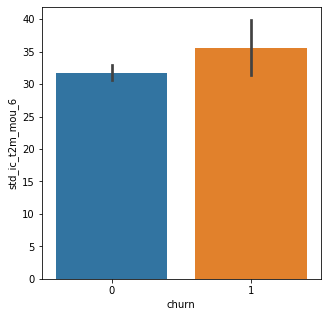

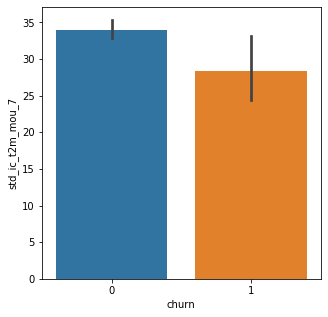

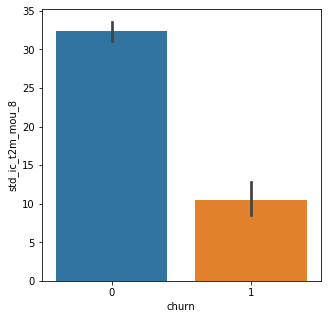

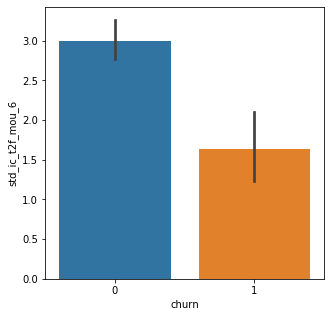

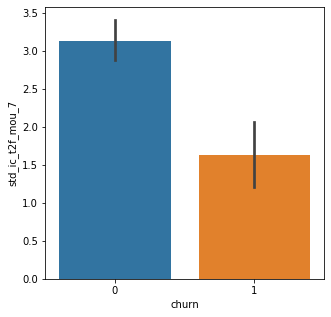

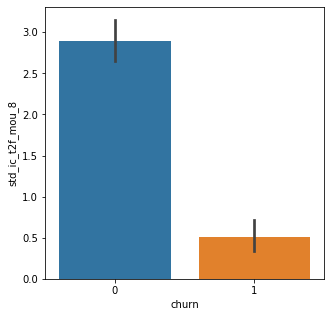

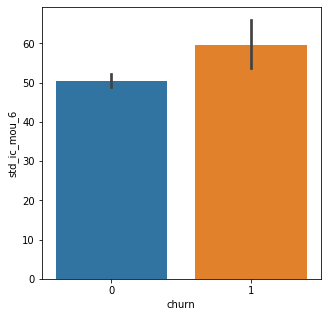

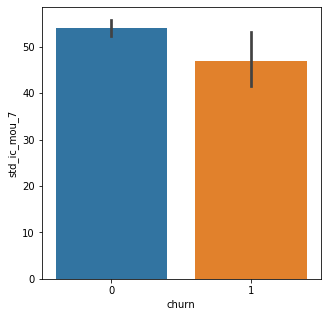

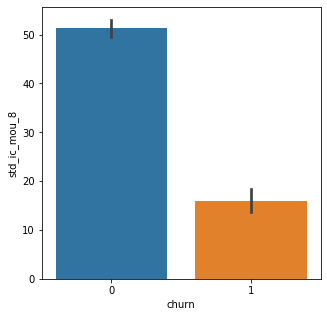

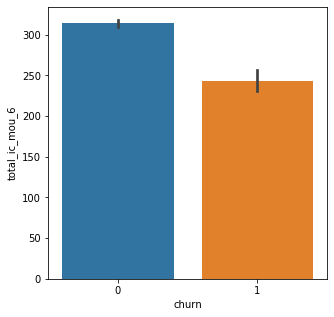

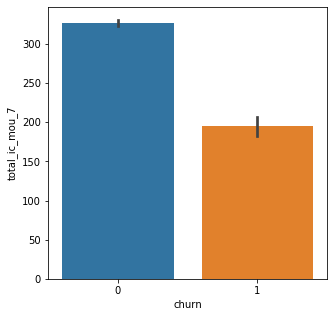

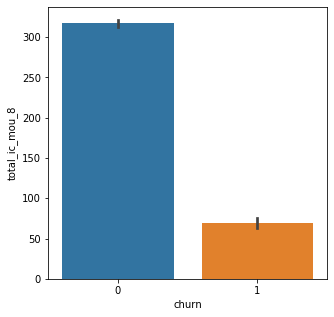

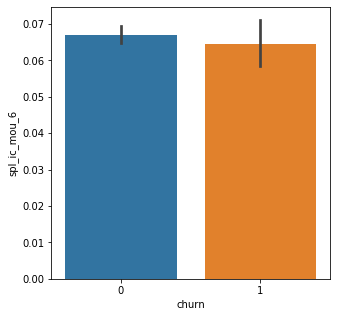

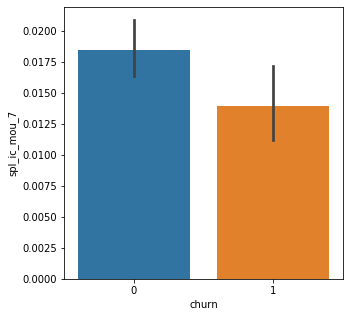

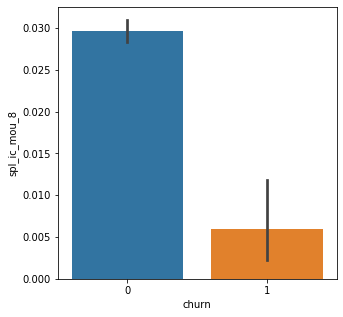

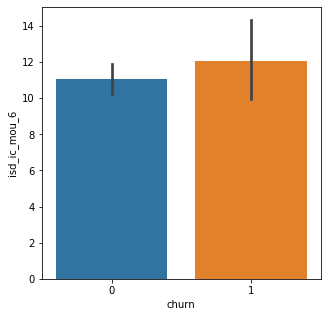

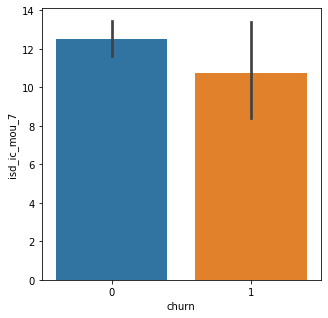

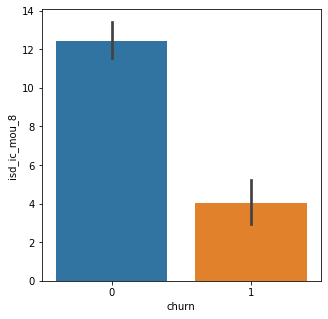

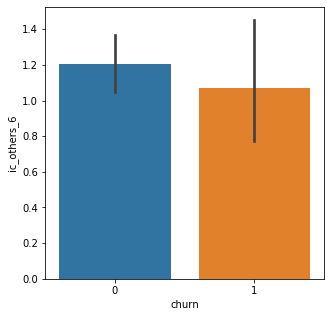

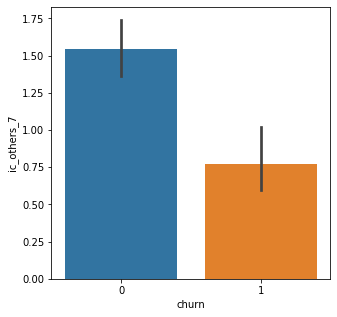

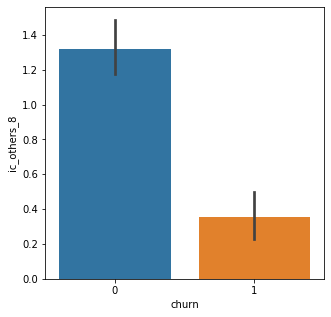

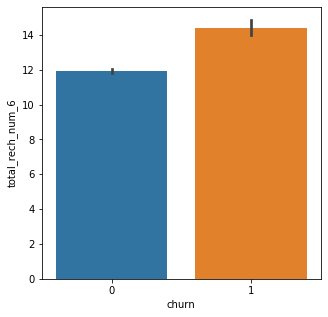

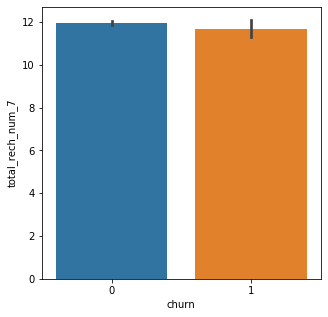

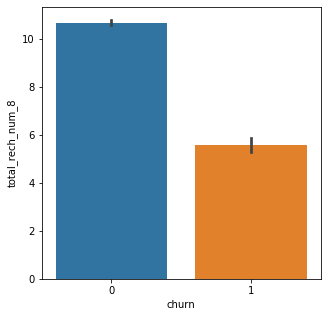

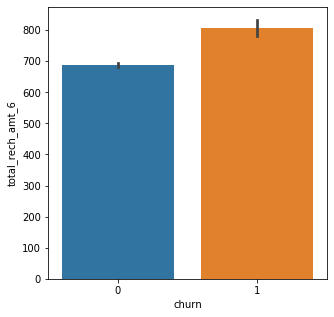

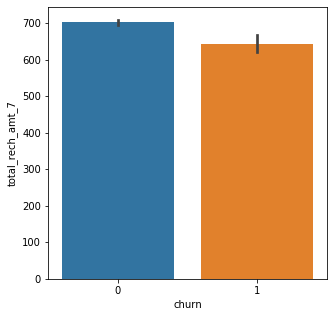

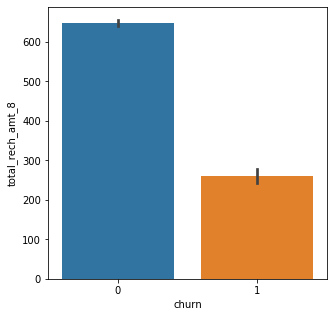

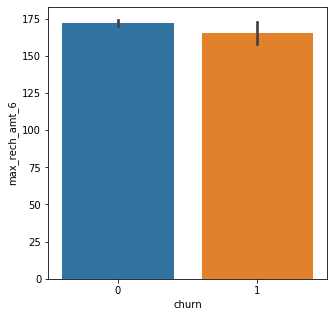

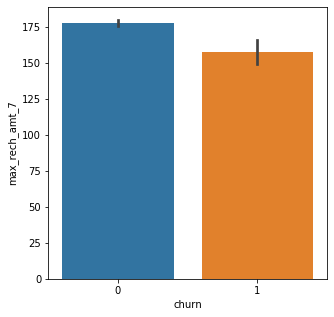

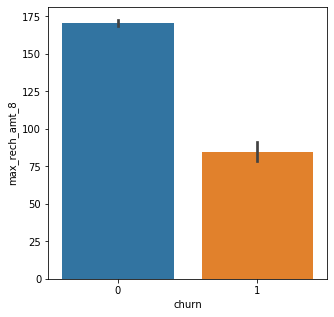

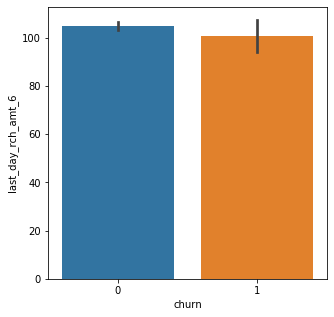

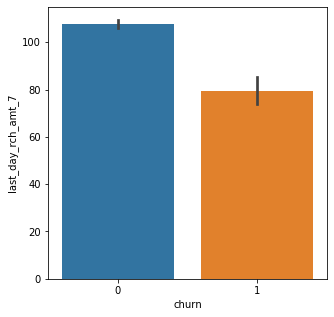

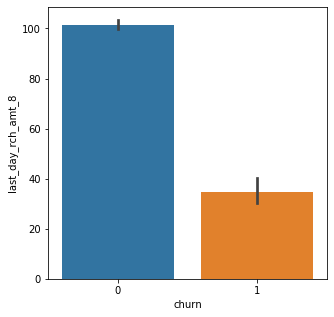

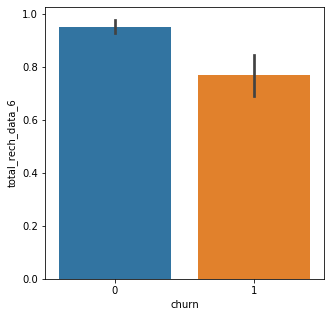

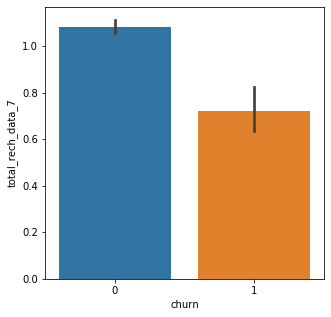

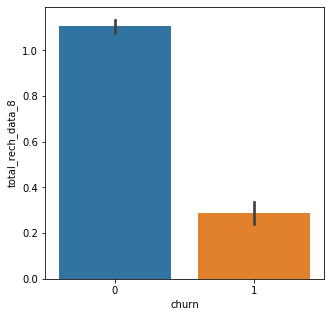

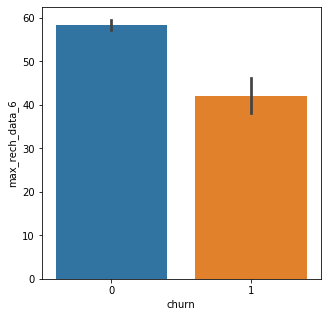

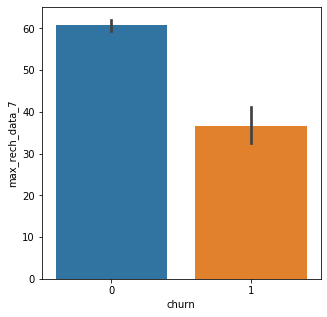

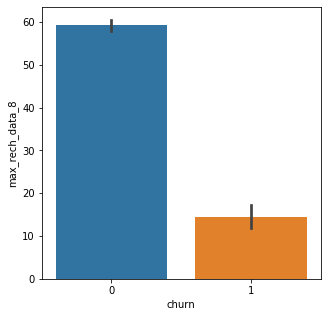

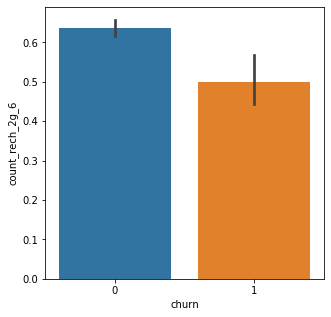

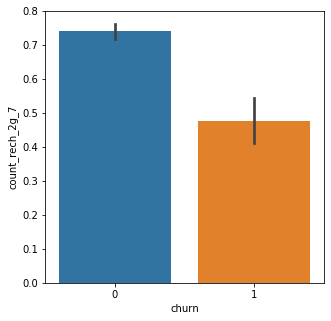

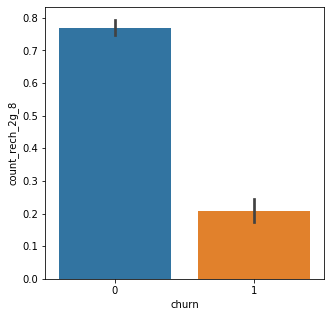

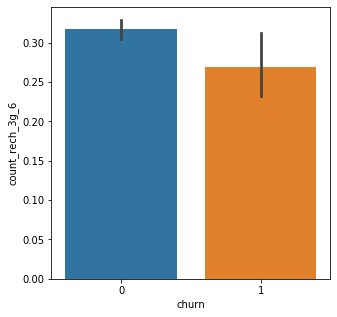

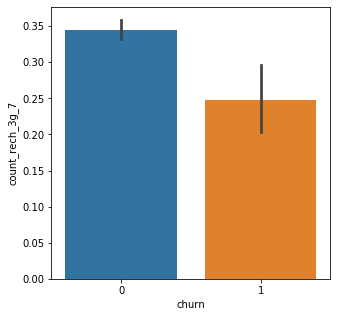

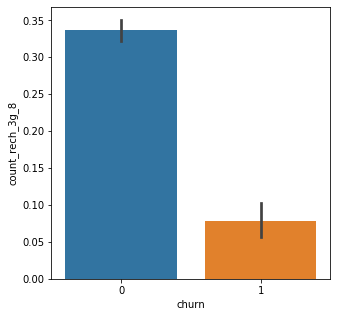

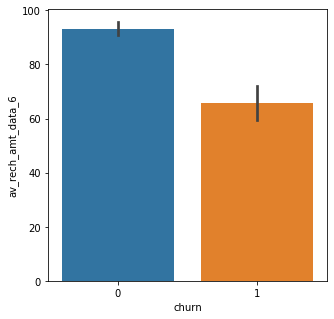

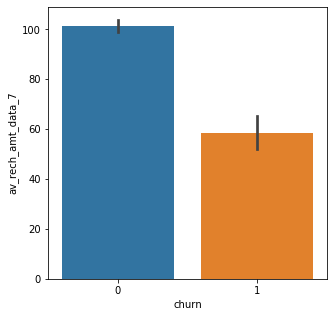

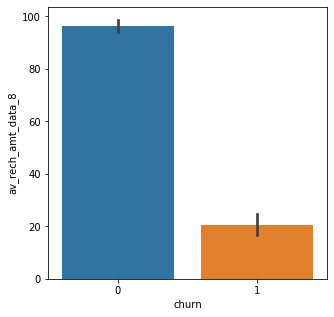

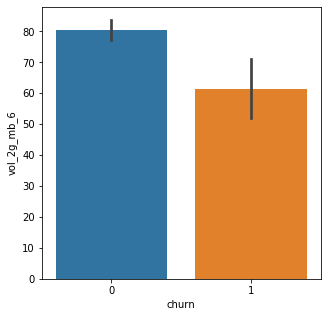

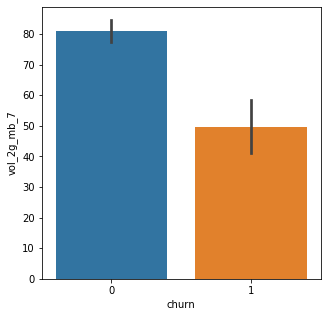

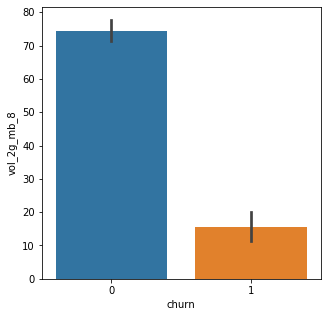

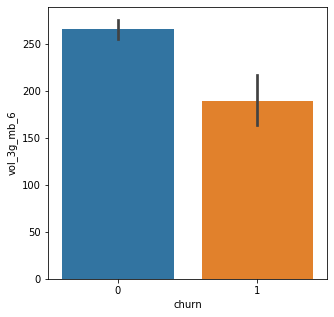

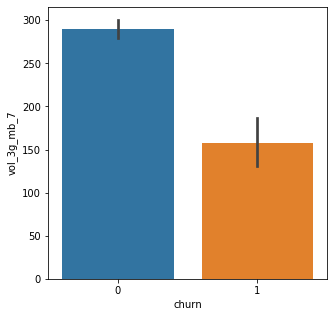

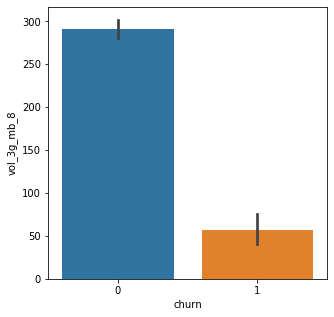

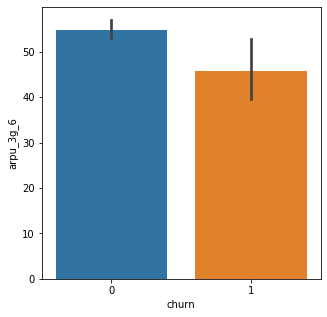

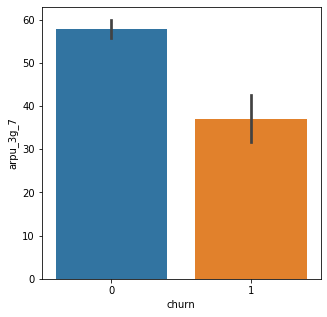

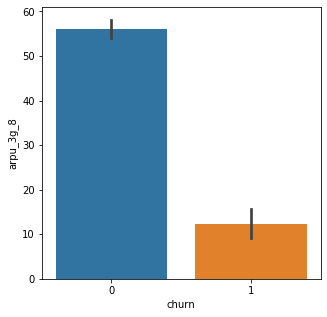

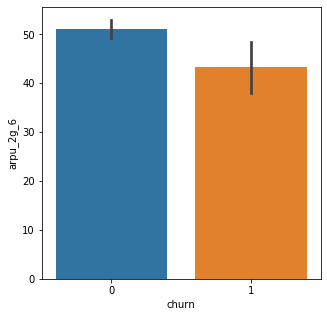

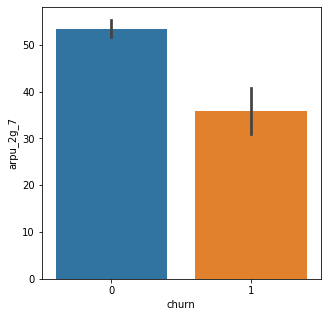

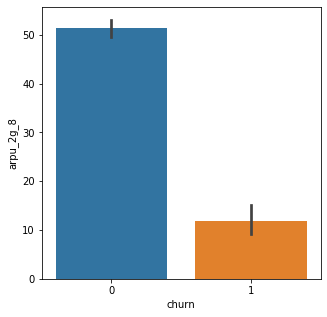

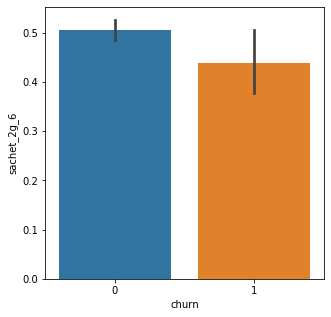

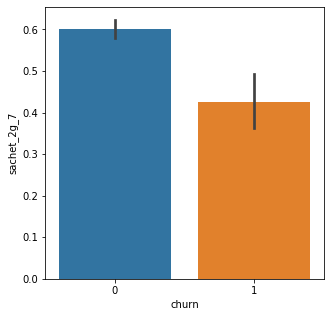

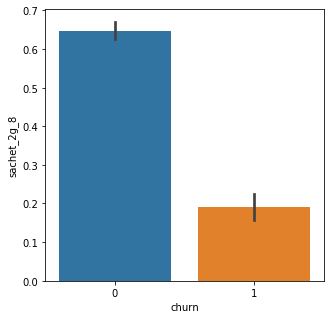

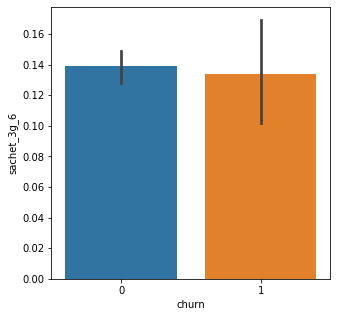

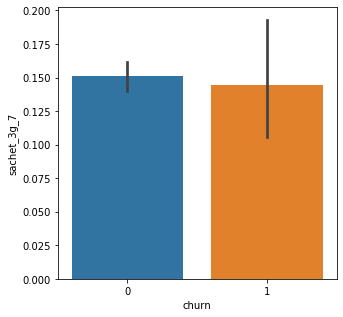

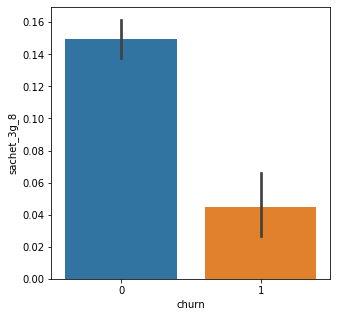

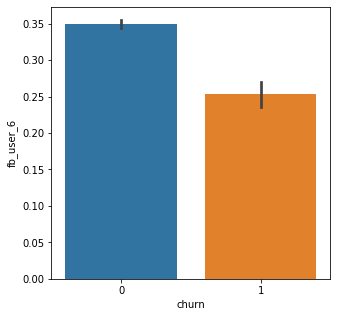

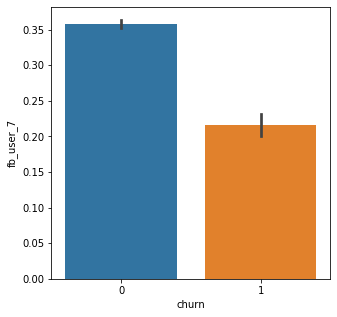

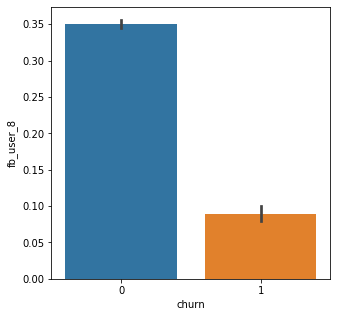

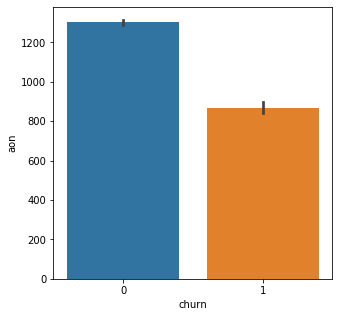

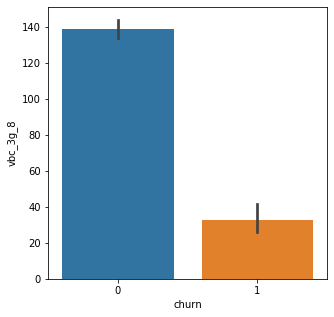

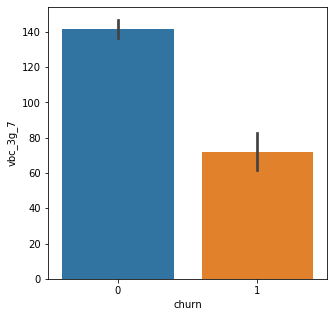

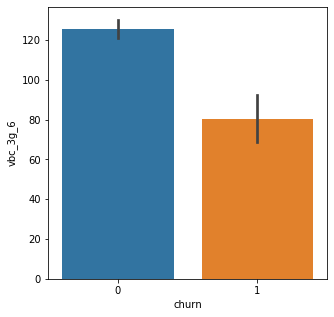

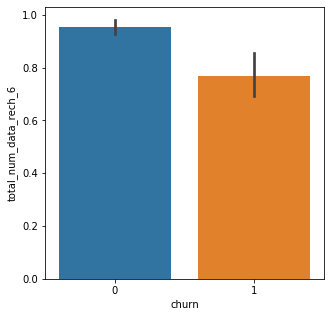

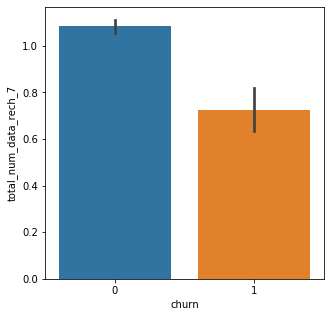

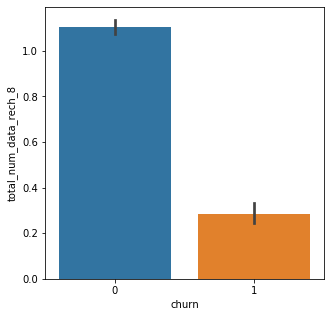

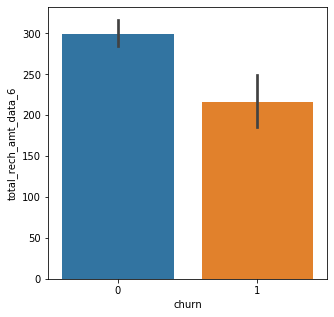

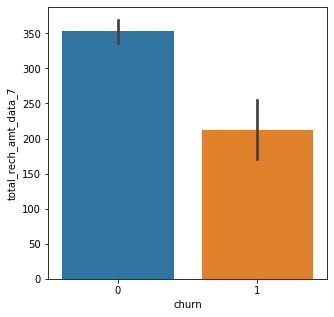

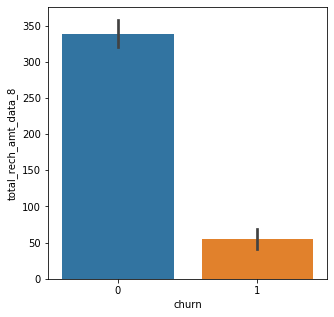

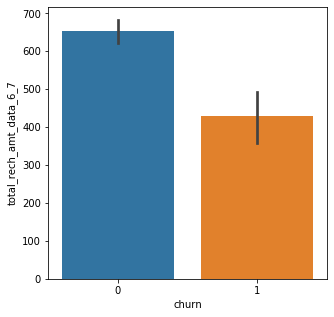

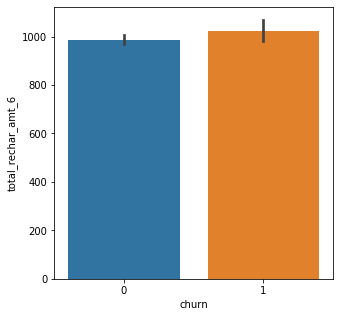

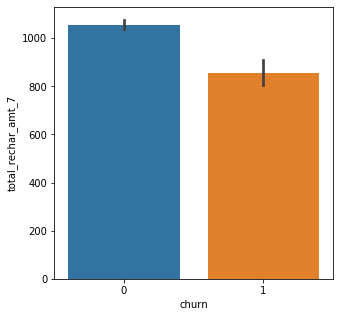

In [48]:
# Plotting each variable against the dependent variable 'churn'
cont_cols = [col for col in df_high_val_cust.columns if col not in ['churn','mobile_number']]
for col in cont_cols:
    plt.figure(figsize=(5, 5))
    sns.barplot(x='churn', y=col, data=df_high_val_cust)
    plt.show()

Average revenue from the churn cutomers are observed to go down comparitively from 6th and 7th month in the 8th month which is the Action phase.
Minutes of usage for all kind of calls within the same operator network are observed to also show the same behavior as the average revenue, i.e, for the 6th and 7th month the churners have shown a higher minute of usage than the 8th month.

## Modelling

In [49]:
# Assigning the x and y variables
y = df_high_val_cust['churn']
X = df_high_val_cust.drop('churn',axis=1)

In [50]:
# importing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE

In [51]:
# splitting the data into train and test data 
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size = 0.7,test_size=0.3,random_state = 100)

In [52]:
# scaling the data using minmax scaling method
scaler = MinMaxScaler()

# Scaling and Transforming the train and test dataframes
X_train_scale = scaler.fit_transform(X_train)

# # Assigning the columns names to the scaled data frame
X_train_scale = pd.DataFrame(X_train_scale)
X_train_scale.columns = X_train.columns

In [53]:
# Setting the index on the scaled dataframe as X_train
X_train_scale_gen = X_train_scale.set_index(X_train.index)

In [54]:
# Smoting the dataframe
smote = SMOTE(random_state=100)
X_train_scale, y_train_M1 = smote.fit_resample(X_train_scale_gen, y_train)

In [55]:
# selecting the 25 variables
logreg = LogisticRegression()
rfe = RFE(logreg, 25)   
rfe = rfe.fit(X_train_scale, y_train_M1)

In [56]:
# Checking the values which are considered for RFE
rfe.support_

array([ True, False, False, False, False,  True, False, False,  True,
       False, False, False, False,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False,  True, False, False, False,
       False,  True,

In [57]:
# Checking the cosidered varibles and ranking for RFE
list(zip(X_train_scale.columns, rfe.support_, rfe.ranking_))

[('arpu_6', True, 1),
 ('arpu_7', False, 24),
 ('arpu_8', False, 42),
 ('onnet_mou_6', False, 98),
 ('onnet_mou_7', False, 106),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 94),
 ('offnet_mou_7', False, 4),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 40),
 ('roam_ic_mou_7', False, 55),
 ('roam_ic_mou_8', False, 70),
 ('roam_og_mou_6', False, 111),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 119),
 ('loc_og_t2t_mou_7', False, 88),
 ('loc_og_t2t_mou_8', False, 10),
 ('loc_og_t2m_mou_6', False, 92),
 ('loc_og_t2m_mou_7', False, 120),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 3),
 ('loc_og_t2f_mou_7', False, 23),
 ('loc_og_t2f_mou_8', False, 20),
 ('loc_og_t2c_mou_6', False, 51),
 ('loc_og_t2c_mou_7', False, 33),
 ('loc_og_t2c_mou_8', False, 34),
 ('loc_og_mou_6', False, 99),
 ('loc_og_mou_7', False, 63),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 69),
 ('std_og_t2t_mou_7', False, 80),
 ('std_og_t

In [58]:
# Assigning the selected features to col 
col = X_train_scale.columns[rfe.support_]
col

Index(['arpu_6', 'onnet_mou_8', 'offnet_mou_8', 'roam_og_mou_7',
       'roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_mou_7',
       'total_og_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'loc_ic_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'total_rech_amt_6', 'last_day_rch_amt_8',
       'total_rech_data_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8',
       'arpu_2g_7', 'sachet_3g_7', 'vbc_3g_8'],
      dtype='object')

In [59]:
# checking the unselected rows 
X_train_scale.columns[~rfe.support_]

Index(['arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6',
       'offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6',
       ...
       'vbc_3g_6', 'total_num_data_rech_6', 'total_num_data_rech_7',
       'total_num_data_rech_8', 'total_rech_amt_data_6',
       'total_rech_amt_data_7', 'total_rech_amt_data_8',
       'total_rech_amt_data_6_7', 'total_rechar_amt_6', 'total_rechar_amt_7'],
      dtype='object', length=126)

In [60]:
#checking the p-values for the feature significance
X_train_sm = sm.add_constant(X_train_scale[col])
logm2 = sm.GLM(y_train_M1,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38232
Model:                            GLM   Df Residuals:                    38206
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15159.
Date:                Sun, 29 Nov 2020   Deviance:                       30317.
Time:                        00:56:09   Pearson chi2:                 2.68e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4822      0.271      1.780      0.075      -0.049       1.013
arpu_6                 8.2967      3.503      2.368      0.018       1.430      15.163
onnet_mou_8           -7.7583     22.803     -0.340      0.734     -52.451      36.935
offnet_mou_8          -5.6491     16.671     -0.339      0.735     -38.323      27.025
roam_og_mou_7          4.9485      0.492     10.064      0.000       3.985       5.912
roam_og_mou_8          6.7256     11.368      0.592      0.554     -15.554      29.006
loc_og_t2m_mou_8      -4.7582      2.000     -2.380      0.017      -8.677      -0.839
loc_og_mou_8         -21.1506      3.214     -6.581      0.000     -27.449     -14.852
std_og_mou_7           6.0246      0.337     17.886      0.000       5.364       6.685
total_og_mou_8        -5.5819     23.422     -0.238      0.812     -51.487      40.324
loc_ic_t2m_mou_7      18.7698      1.198     15.663      0.000      16.421      21.119
loc_ic_t2m_mou_8     -44.7766      3.130    -14.304      0.000     -50.912     -38.641
loc_ic_mou_8          -0.0057      2.178     -0.003      0.998      -4.274       4.263
total_ic_mou_7         2.7926      0.962      2.903      0.004       0.907       4.678
total_ic_mou_8       -16.9768      1.551    -10.949      0.000     -20.016     -13.938
spl_ic_mou_8          -6.2146      0.363    -17.118      0.000      -6.926      -5.503
total_rech_num_8      -7.3011      0.523    -13.971      0.000      -8.325      -6.277
total_rech_amt_6      12.6691      3.356      3.775      0.000       6.092      19.246
last_day_rch_amt_8   -14.5397      0.736    -19.749      0.000     -15.983     -13.097
total_rech_data_8     -5.3998      0.865     -6.246      0.000      -7.094      -3.705
av_rech_amt_data_8    -6.6587      1.057     -6.297      0.000      -8.731      -4.586
vol_2g_mb_8           -8.7888      0.880     -9.982      0.000     -10.514      -7.063
vol_3g_mb_8          -12.6293      1.885     -6.699      0.000     -16.325      -8.934
arpu_2g_7              8.7657      0.784     11.186      0.000       7.230      10.302
sachet_3g_7            6.2636      0.806      7.773      0.000       4.684       7.843
vbc_3g_8              -3.9372      0.689     -5.711      0.000      -5.289      -2.586
======================================================================================
"""

In [61]:
# Dropping variable loc_ic_mou_8, as it has high p-value of 0.998
col1 = col.drop('loc_ic_mou_8',1)

In [62]:
#checking the p-values for the feature significance
X_train_sm = sm.add_constant(X_train_scale[col1])
logm2 = sm.GLM(y_train_M1,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38232
Model:                            GLM   Df Residuals:                    38207
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15159.
Date:                Sun, 29 Nov 2020   Deviance:                       30317.
Time:                        00:56:10   Pearson chi2:                 2.68e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4822      0.271      1.780      0.075      -0.049       1.013
arpu_6                 8.2969      3.503      2.369      0.018       1.432      15.162
onnet_mou_8           -7.7587     22.802     -0.340      0.734     -52.451      36.933
offnet_mou_8          -5.6493     16.670     -0.339      0.735     -38.323      27.024
roam_og_mou_7          4.9485      0.492     10.066      0.000       3.985       5.912
roam_og_mou_8          6.7258     11.367      0.592      0.554     -15.554      29.005
loc_og_t2m_mou_8      -4.7568      1.934     -2.459      0.014      -8.548      -0.966
loc_og_mou_8         -21.1534      3.041     -6.956      0.000     -27.114     -15.193
std_og_mou_7           6.0246      0.337     17.888      0.000       5.365       6.685
total_og_mou_8        -5.5815     23.421     -0.238      0.812     -51.486      40.323
loc_ic_t2m_mou_7      18.7696      1.197     15.681      0.000      16.424      21.116
loc_ic_t2m_mou_8     -44.7810      2.655    -16.866      0.000     -49.985     -39.577
total_ic_mou_7         2.7926      0.962      2.904      0.004       0.908       4.678
total_ic_mou_8       -16.9788      1.343    -12.640      0.000     -19.612     -14.346
spl_ic_mou_8          -6.2146      0.363    -17.119      0.000      -6.926      -5.503
total_rech_num_8      -7.3011      0.523    -13.972      0.000      -8.325      -6.277
total_rech_amt_6      12.6689      3.355      3.776      0.000       6.093      19.245
last_day_rch_amt_8   -14.5396      0.736    -19.750      0.000     -15.983     -13.097
total_rech_data_8     -5.3998      0.865     -6.246      0.000      -7.094      -3.705
av_rech_amt_data_8    -6.6588      1.057     -6.297      0.000      -8.731      -4.586
vol_2g_mb_8           -8.7888      0.880     -9.983      0.000     -10.514      -7.063
vol_3g_mb_8          -12.6293      1.885     -6.699      0.000     -16.325      -8.934
arpu_2g_7              8.7657      0.784     11.188      0.000       7.230      10.301
sachet_3g_7            6.2636      0.806      7.774      0.000       4.684       7.843
vbc_3g_8              -3.9373      0.689     -5.711      0.000      -5.288      -2.586
======================================================================================
"""

In [63]:
# Dropping variable total_og_mou_8, as it has high p-value of 0.812
col1 = col1.drop('total_og_mou_8',1)

In [64]:
#checking the p-values for the feature significance
X_train_sm = sm.add_constant(X_train_scale[col1])
logm2 = sm.GLM(y_train_M1,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38232
Model:                            GLM   Df Residuals:                    38208
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15159.
Date:                Sun, 29 Nov 2020   Deviance:                       30317.
Time:                        00:56:10   Pearson chi2:                 2.66e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4803      0.271      1.774      0.076      -0.050       1.011
arpu_6                 8.3251      3.501      2.378      0.017       1.463      15.187
onnet_mou_8          -13.1905      0.662    -19.935      0.000     -14.487     -11.894
offnet_mou_8          -9.6200      0.537    -17.898      0.000     -10.673      -8.567
roam_og_mou_7          4.9450      0.492     10.060      0.000       3.982       5.908
roam_og_mou_8          9.4268      0.879     10.720      0.000       7.703      11.150
loc_og_t2m_mou_8      -4.7594      1.934     -2.461      0.014      -8.550      -0.969
loc_og_mou_8         -21.1459      3.041     -6.954      0.000     -27.106     -15.186
std_og_mou_7           6.0243      0.337     17.887      0.000       5.364       6.684
loc_ic_t2m_mou_7      18.7767      1.197     15.690      0.000      16.431      21.122
loc_ic_t2m_mou_8     -44.7806      2.655    -16.865      0.000     -49.985     -39.576
total_ic_mou_7         2.7855      0.961      2.897      0.004       0.901       4.670
total_ic_mou_8       -16.9830      1.343    -12.644      0.000     -19.616     -14.351
spl_ic_mou_8          -6.2173      0.363    -17.134      0.000      -6.929      -5.506
total_rech_num_8      -7.3215      0.516    -14.200      0.000      -8.332      -6.311
total_rech_amt_6      12.6320      3.352      3.768      0.000       6.062      19.202
last_day_rch_amt_8   -14.5460      0.736    -19.771      0.000     -15.988     -13.104
total_rech_data_8     -5.3970      0.864     -6.243      0.000      -7.091      -3.703
av_rech_amt_data_8    -6.6536      1.057     -6.294      0.000      -8.726      -4.581
vol_2g_mb_8           -8.7879      0.880     -9.982      0.000     -10.513      -7.062
vol_3g_mb_8          -12.6286      1.885     -6.698      0.000     -16.324      -8.933
arpu_2g_7              8.7598      0.783     11.184      0.000       7.225      10.295
sachet_3g_7            6.2634      0.806      7.773      0.000       4.684       7.843
vbc_3g_8              -3.9366      0.689     -5.710      0.000      -5.288      -2.585
======================================================================================
"""

## VIF

In [65]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
# Checking the VIF values
vif = pd.DataFrame()
vif['Features'] = X_train_scale[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train_scale[col1].values, i) for i in range(X_train_scale[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10      total_ic_mou_7  8.77
11      total_ic_mou_8  8.48
9     loc_ic_t2m_mou_8  7.64
8     loc_ic_t2m_mou_7  7.52
0               arpu_6  7.42
5     loc_og_t2m_mou_8  5.34
6         loc_og_mou_8  5.33
17  av_rech_amt_data_8  5.23
14    total_rech_amt_6  4.70
19         vol_3g_mb_8  4.24
2         offnet_mou_8  3.25
13    total_rech_num_8  3.24
7         std_og_mou_7  3.00
1          onnet_mou_8  2.52
16   total_rech_data_8  2.22
20           arpu_2g_7  2.00
22            vbc_3g_8  1.93
3        roam_og_mou_7  1.82
4        roam_og_mou_8  1.82
15  last_day_rch_amt_8  1.56
21         sachet_3g_7  1.41
18         vol_2g_mb_8  1.31
12        spl_ic_mou_8  1.07

In [67]:
# Dropping variable total_ic_mou_7, as it has high VIF value of 8.77
col1 = col1.drop('total_ic_mou_7',1)

In [68]:
# Checking the VIF values
vif = pd.DataFrame()
vif['Features'] = X_train_scale[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train_scale[col1].values, i) for i in range(X_train_scale[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0               arpu_6  7.30
9     loc_ic_t2m_mou_8  5.76
5     loc_og_t2m_mou_8  5.33
6         loc_og_mou_8  5.32
16  av_rech_amt_data_8  5.23
13    total_rech_amt_6  4.70
18         vol_3g_mb_8  4.24
10      total_ic_mou_8  4.02
8     loc_ic_t2m_mou_7  3.46
2         offnet_mou_8  3.24
12    total_rech_num_8  3.24
7         std_og_mou_7  2.97
1          onnet_mou_8  2.51
15   total_rech_data_8  2.22
19           arpu_2g_7  2.00
21            vbc_3g_8  1.92
4        roam_og_mou_8  1.81
3        roam_og_mou_7  1.81
14  last_day_rch_amt_8  1.56
20         sachet_3g_7  1.41
17         vol_2g_mb_8  1.31
11        spl_ic_mou_8  1.07

In [69]:
# Dropping variable arpu_6, as it has high VIF value of 7.30
col1 = col1.drop('arpu_6',1)

In [70]:
# Checking the VIF values
vif = pd.DataFrame()
vif['Features'] = X_train_scale[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train_scale[col1].values, i) for i in range(X_train_scale[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
8     loc_ic_t2m_mou_8  5.73
4     loc_og_t2m_mou_8  5.33
5         loc_og_mou_8  5.28
15  av_rech_amt_data_8  5.22
17         vol_3g_mb_8  4.21
9       total_ic_mou_8  3.99
7     loc_ic_t2m_mou_7  3.35
1         offnet_mou_8  3.16
11    total_rech_num_8  2.85
6         std_og_mou_7  2.73
0          onnet_mou_8  2.46
14   total_rech_data_8  2.22
12    total_rech_amt_6  2.22
18           arpu_2g_7  1.97
20            vbc_3g_8  1.92
3        roam_og_mou_8  1.81
2        roam_og_mou_7  1.79
13  last_day_rch_amt_8  1.53
19         sachet_3g_7  1.41
16         vol_2g_mb_8  1.31
10        spl_ic_mou_8  1.07

In [71]:
# Dropping variable loc_ic_t2m_mou_8, as it has high VIF value of 5.73
col1 = col1.drop('loc_ic_t2m_mou_8',1)

In [72]:
# Checking the VIF values
vif = pd.DataFrame()
vif['Features'] = X_train_scale[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train_scale[col1].values, i) for i in range(X_train_scale[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5         loc_og_mou_8  5.26
14  av_rech_amt_data_8  5.22
4     loc_og_t2m_mou_8  5.10
16         vol_3g_mb_8  4.21
1         offnet_mou_8  3.16
10    total_rech_num_8  2.85
6         std_og_mou_7  2.72
8       total_ic_mou_8  2.60
0          onnet_mou_8  2.46
7     loc_ic_t2m_mou_7  2.38
13   total_rech_data_8  2.22
11    total_rech_amt_6  2.19
17           arpu_2g_7  1.97
19            vbc_3g_8  1.92
3        roam_og_mou_8  1.81
2        roam_og_mou_7  1.79
12  last_day_rch_amt_8  1.53
18         sachet_3g_7  1.41
15         vol_2g_mb_8  1.31
9         spl_ic_mou_8  1.07

In [73]:
# Dropping variable loc_og_mou_8, as it has high VIF value of 5.26
col1 = col1.drop('loc_og_mou_8',1)

In [74]:
# Checking the VIF values
vif = pd.DataFrame()
vif['Features'] = X_train_scale[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train_scale[col1].values, i) for i in range(X_train_scale[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
13  av_rech_amt_data_8  5.22
15         vol_3g_mb_8  4.21
1         offnet_mou_8  3.10
9     total_rech_num_8  2.82
4     loc_og_t2m_mou_8  2.68
7       total_ic_mou_8  2.57
5         std_og_mou_7  2.51
6     loc_ic_t2m_mou_7  2.38
12   total_rech_data_8  2.22
10    total_rech_amt_6  2.16
16           arpu_2g_7  1.97
18            vbc_3g_8  1.92
0          onnet_mou_8  1.84
3        roam_og_mou_8  1.80
2        roam_og_mou_7  1.79
11  last_day_rch_amt_8  1.53
17         sachet_3g_7  1.41
14         vol_2g_mb_8  1.31
8         spl_ic_mou_8  1.07

In [75]:
# Dropping variable av_rech_amt_data_8, as it has high VIF value of 5.22
col1 = col1.drop('av_rech_amt_data_8',1)

In [76]:
# Checking the VIF values
vif = pd.DataFrame()
vif['Features'] = X_train_scale[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train_scale[col1].values, i) for i in range(X_train_scale[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1         offnet_mou_8  3.10
9     total_rech_num_8  2.82
4     loc_og_t2m_mou_8  2.68
7       total_ic_mou_8  2.56
5         std_og_mou_7  2.51
14         vol_3g_mb_8  2.50
6     loc_ic_t2m_mou_7  2.38
10    total_rech_amt_6  2.15
12   total_rech_data_8  1.96
17            vbc_3g_8  1.90
0          onnet_mou_8  1.84
15           arpu_2g_7  1.82
3        roam_og_mou_8  1.80
2        roam_og_mou_7  1.79
11  last_day_rch_amt_8  1.51
16         sachet_3g_7  1.35
13         vol_2g_mb_8  1.18
8         spl_ic_mou_8  1.07

In [77]:
#Verifying the p-value of the features after feature elimination on the basis of VIF values 
X_train_sm = sm.add_constant(X_train_scale[col1])
logm2 = sm.GLM(y_train_M1,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38232
Model:                            GLM   Df Residuals:                    38213
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15414.
Date:                Sun, 29 Nov 2020   Deviance:                       30828.
Time:                        00:56:20   Pearson chi2:                 2.02e+07
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.1471      0.035     33.028      0.000       1.079       1.215
onnet_mou_8          -14.8196      0.641    -23.115      0.000     -16.076     -13.563
offnet_mou_8         -10.1712      0.533    -19.075      0.000     -11.216      -9.126
roam_og_mou_7          4.7055      0.496      9.488      0.000       3.733       5.678
roam_og_mou_8         10.9366      0.891     12.268      0.000       9.189      12.684
loc_og_t2m_mou_8     -21.8837      1.091    -20.066      0.000     -24.021     -19.746
std_og_mou_7           6.9373      0.332     20.905      0.000       6.287       7.588
loc_ic_t2m_mou_7      12.3806      0.632     19.574      0.000      11.141      13.620
total_ic_mou_8       -30.0858      0.914    -32.924      0.000     -31.877     -28.295
spl_ic_mou_8          -6.1967      0.362    -17.138      0.000      -6.905      -5.488
total_rech_num_8      -7.6707      0.513    -14.960      0.000      -8.676      -6.666
total_rech_amt_6      21.3716      1.287     16.612      0.000      18.850      23.893
last_day_rch_amt_8   -15.6660      0.736    -21.285      0.000     -17.109     -14.223
total_rech_data_8     -7.9481      0.812     -9.794      0.000      -9.539      -6.358
vol_2g_mb_8          -10.3657      0.857    -12.101      0.000     -12.045      -8.687
vol_3g_mb_8          -21.5601      1.540    -14.001      0.000     -24.578     -18.542
arpu_2g_7              7.9366      0.732     10.848      0.000       6.503       9.371
sachet_3g_7            7.5251      0.794      9.477      0.000       5.969       9.081
vbc_3g_8              -3.8350      0.690     -5.558      0.000      -5.187      -2.483
======================================================================================
"""

In [78]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.010863
1    0.379328
2    0.073163
3    0.200734
4    0.407941
5    0.330440
6    0.076552
7    0.177768
8    0.001978
9    0.073933
dtype: float64

In [79]:
# Checking the columns in X_train_sm
X_train_sm.columns

Index(['const', 'onnet_mou_8', 'offnet_mou_8', 'roam_og_mou_7',
       'roam_og_mou_8', 'loc_og_t2m_mou_8', 'std_og_mou_7', 'loc_ic_t2m_mou_7',
       'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'total_rech_amt_6', 'last_day_rch_amt_8', 'total_rech_data_8',
       'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_2g_7', 'sachet_3g_7', 'vbc_3g_8'],
      dtype='object')

In [80]:
# Checking the shape
X_train_sm.shape

(38232, 19)

In [81]:
# Reshaping y_train_pred 
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.01086281, 0.37932795, 0.073163  , 0.20073357, 0.40794076,
       0.33044026, 0.07655232, 0.17776833, 0.00197755, 0.0739327 ])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [82]:
# Converting into y_train_pred and y_train.values into a dataframe and also adding Lead Number to the dataframe
y_train_pred_final = pd.DataFrame({'Churn':y_train_M1.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['mobile_number'] = y_train_M1.index
y_train_pred_final.head()

Churn  Churn_Prob  mobile_number
0      0    0.010863              0
1      0    0.379328              1
2      0    0.073163              2
3      0    0.200734              3
4      0    0.407941              4

##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [83]:
# Considering 0.5 as threshold value and checking the predicted Converted values wrt Actual Converted values
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Churn  Churn_Prob  mobile_number  predicted
0      0    0.010863              0          0
1      0    0.379328              1          0
2      0    0.073163              2          0
3      0    0.200734              3          0
4      0    0.407941              4          0

In [84]:
# importing the metrics library
from sklearn import metrics

In [85]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[15591  3525]
 [ 2805 16311]]


In [86]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8344318895166353


## Metrics beyond simply accuracy

In [87]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [88]:
#Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8532642812303829

In [89]:
# Plotting the ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [90]:
# Finding out the metrics from the ROC curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

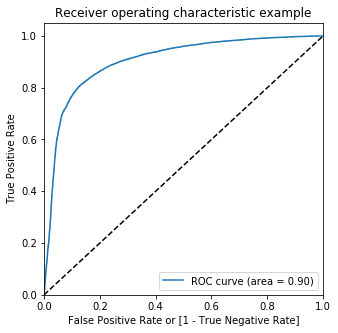

In [91]:
# Plotting the ROC curve
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [92]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  mobile_number  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0      0    0.010863              0          0    1    0    0    0    0    0   
1      0    0.379328              1          0    1    1    1    1    0    0   
2      0    0.073163              2          0    1    0    0    0    0    0   
3      0    0.200734              3          0    1    1    1    0    0    0   
4      0    0.407941              4          0    1    1    1    1    1    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [93]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.691829  0.973530  0.410128
0.2   0.2  0.752014  0.949885  0.554143
0.3   0.3  0.791117  0.923886  0.658349
0.4   0.4  0.819418  0.893074  0.745763
0.5   0.5  0.834432  0.853264  0.815599
0.6   0.6  0.839794  0.805608  0.873980
0.7   0.7  0.827579  0.739590  0.915568
0.8   0.8  0.793419  0.639935  0.946903
0.9   0.9  0.595705  0.208464  0.982946


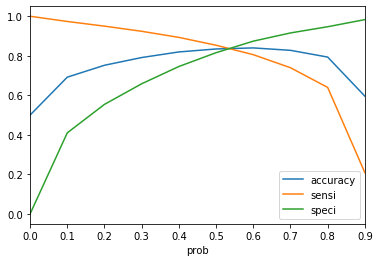

In [94]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.5 is the optimum point to take it as a cutoff probability.

In [95]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  mobile_number  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0      0    0.010863              0          0    1    0    0    0    0    0   
1      0    0.379328              1          0    1    1    1    1    0    0   
2      0    0.073163              2          0    1    0    0    0    0    0   
3      0    0.200734              3          0    1    1    1    0    0    0   
4      0    0.407941              4          0    1    1    1    1    1    0   

   0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0                0  
1    0    0    0    0                0  
2    0    0    0    0                0  
3    0    0    0    0                0  
4    0    0    0    0                0

In [96]:
# Checking the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.8344318895166353

In [97]:
# Checking the confusion matrix
confusion1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion1

array([[15591,  3525],
       [ 2805, 16311]], dtype=int64)

In [98]:
# Assigning the confusion matrix values to the below variables
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [99]:
# Recall
confusion1[1,1]/(confusion1[1,0]+confusion1[1,1])

0.8532642812303829

In [100]:
#Precision
confusion1[1,1]/(confusion1[0,1]+confusion1[1,1])

0.8222928009679371

####  Making predictions on the test set

In [101]:
# scaling the X_test
X_test_scale = scaler.transform(X_test)

In [102]:
# Converting this array to the data frame
X_test_scale = pd.DataFrame(X_test_scale)

# Assigning the columns from X_test to X_test_scale
X_test_scale.columns = X_test.columns

# displaying X_test_scale top 5 rows
X_test_scale.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  0.091455  0.071884  0.041687     0.035618     0.055901     0.017594   
1  0.084332  0.067800  0.035542     0.006027     0.009797     0.008322   
2  0.104171  0.065924  0.041703     0.026622     0.017672     0.013800   
3  0.088609  0.066748  0.047570     0.044340     0.038824     0.033461   
4  0.092626  0.059704  0.029022     0.059156     0.020944     0.003031   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0      0.084304      0.109388      0.105502       0.000000       0.000000   
1      0.017723      0.027793      0.044339       0.002273       0.000000   
2      0.055413      0.035327      0.031355       0.029564       0.000000   
3      0.041333      0.048249      0.075566       0.000000       0.000000   
4      0.041608      0.003408      0.002886       0.000000       0.008152   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0       0.000000       0.000000       0.000000       0.000000   
1       0.000000       0.009049       0.014424       0.000000   
2       0.000000       0.035175       0.000000       0.000000   
3       0.000000       0.000000       0.000000       0.000000   
4       0.003636       0.000000       0.029278       0.010358   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0          0.008022          0.006318          0.003847          0.029490   
1          0.000191          0.009692          0.008322          0.005802   
2          0.021059          0.015828          0.013800          0.057441   
3          0.000044          0.000028          0.001171          0.000668   
4          0.004749          0.000301          0.000000          0.003607   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0          0.043622          0.059397          0.004257          0.003960   
1          0.009844          0.004614          0.000000          0.000000   
2          0.040536          0.042515          0.019927          0.011068   
3          0.001235          0.003412          0.000000          0.000000   
4          0.000636          0.000000          0.000000          0.000000   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0          0.004427           0.00361          0.008496          0.002388   
1          0.000000           0.00000          0.016113          0.000000   
2          0.009090           0.00000          0.000000          0.000000   
3          0.000000           0.00000          0.004125          0.012165   
4          0.000000           0.00000          0.000000          0.000000   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0      0.018224      0.032543      0.030814          0.028662   
1      0.002695      0.015191      0.010179          0.005676   
2      0.039518      0.040860      0.033314          0.001049   
3      0.000323      0.000761      0.002675          0.044361   
4      0.004473      0.000668      0.000000          0.055091   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0          0.052635          0.018443          0.067546          0.084533   
1          0.000560          0.000000          0.010693          0.017793   
2          0.002681          0.000000          0.008964          0.004897   
3          0.040955          0.043321          0.040764          0.047467   
4          0.011415          0.000000          0.039776          0.002186   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0          0.067430          0.000000          0.000000          0.000000   
1          0.043350          0.000000          0.000000          0.000000   
2          0.000923          0.000508          0.001854          0.000000   
3          0.075782          0.000000          0.000000          0.002341   
4          0.000000          0.000000          0.000000          0.000000   



In [103]:
# Adding the constant variable to X_test_sm
X_test_sm = sm.add_constant(X_test_scale[col1])

In [104]:
# making predictions on the testset
y_test_pred = res.predict(X_test_sm)

In [105]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [106]:
# Let's see the head
y_pred_1.head(100)

0
0   0.192164
1   0.263340
2   0.047291
3   0.045612
4   0.803157
5   0.073876
6   0.432806
7   0.579447
8   0.189692
9   0.002025
10  0.133413
11  0.045099
12  0.413620
13  0.080341
14  0.920885
15  0.069783
16  0.128401
17  0.556683
18  0.094751
19  0.451766
20  0.396480
21  0.262137
22  0.727239
23  0.332906
24  0.764981
25  0.173791
26  0.569685
27  0.047757
28  0.116220
29  0.490628
30  0.828327
31  0.202206
32  0.478401
33  0.521193
34  0.118416
35  0.861885
36  0.185196
37  0.023602
38  0.215406
39  0.836762
40  0.014015
41  0.021928
42  0.622364
43  0.794838
44  0.709606
45  0.447966
46  0.042164
47  0.917325
48  0.000040
49  0.467208
50  0.931032
51  0.150544
52  0.243785
53  0.161079
54  0.142308
55  0.159866
56  0.510005
57  0.237189
58  0.103681
59  0.208124
60  0.108791
61  0.147295
62  0.008466
63  0.581589
64  0.401755
65  0.036229
66  0.047225
67  0.339715
68  0.479426
69  0.000705
70  0.353757
71  0.679591
72  0.015913
73  0.086856
74  0.108102
75  0.154057
76  0.228942
77  0.647335
78  0.054729
79  0.168205
80  0.376024
81  0.219132
82  0.215177
83  0.126786
84  0.140164
85  0.000724
86  0.054143
87  0.800133
88  0.841847
89  0.573137
90  0.017068
91  0.614322
92  0.019299
93  0.530442
94  0.000013
95  0.802741
96  0.810111
97  0.057391
98  0.243588
99  0.450730

In [107]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [108]:
# Putting CustID to index
y_test_df['mobile_number'] = y_test_df.index

In [109]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [110]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

y_pred_final.head()

churn  mobile_number         0
0      0     7001266309  0.192164
1      1     7001507260  0.263340
2      0     7000281979  0.047291
3      0     7000654593  0.045612
4      1     7001637032  0.803157

In [111]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [112]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['mobile_number','churn','Churn_Prob'], axis=1)

In [113]:
# Let's see the head of y_pred_final
y_pred_final.head()

mobile_number  churn  Churn_Prob
0     7001266309      0    0.192164
1     7001507260      1    0.263340
2     7000281979      0    0.047291
3     7000654593      0    0.045612
4     7001637032      1    0.803157

In [114]:
# We got the 0.5 as the cut off in train set so we can consider the same 
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [115]:
# Let's see the head of y_pred_final
y_pred_final.head(20)

mobile_number  churn  Churn_Prob  final_predicted
0      7001266309      0    0.192164                0
1      7001507260      1    0.263340                0
2      7000281979      0    0.047291                0
3      7000654593      0    0.045612                0
4      7001637032      1    0.803157                1
5      7002175583      0    0.073876                0
6      7001134581      0    0.432806                0
7      7001464485      0    0.579447                1
8      7000124860      0    0.189692                0
9      7001713046      0    0.002025                0
10     7000796215      0    0.133413                0
11     7000196533      0    0.045099                0
12     7002367868      1    0.413620                0
13     7002389933      0    0.080341                0
14     7001820952      0    0.920885                1
15     7001773898      0    0.069783                0
16     7001400343      0    0.128401                0
17     7001334839      0    0.556683                1
18     7001616729      0    0.094751                0
19     7001146129      0    0.451766                0

In [116]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted)

0.8095450490633364

In [117]:
# Checking the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted )
confusion2

array([[6639, 1565],
       [ 143,  621]], dtype=int64)

In [118]:
# From the confusion matrix finding the below values
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [119]:
#Recall
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.81282722513089

## Model 2 - Logistic Regression with PCA

In [120]:
# Importing libraries
from sklearn.decomposition import PCA

In [121]:
# Constructing the model to contain 95% of variance
pca_again = PCA(0.95)

In [122]:
# Fitting and transforming the scaled train dataset which was balanced using the SMOTE method.
df_train_pca = pca_again.fit_transform(X_train_scale_gen)

In [123]:
# checking the shape of the train df
df_train_pca.shape

(20923, 22)

Following it up with a logistic regression model

In [124]:
# initialising the LogisticRegression object with  class_weight as 'balanced'
learner_pca = LogisticRegression(class_weight = 'balanced')

In [125]:
# Fitting the model
model_pca = learner_pca.fit(df_train_pca, y_train)

In [126]:
# transforming the test data set
df_test_pca = pca_again.transform(X_test_scale)

In [127]:
# Checking the shape of the test data set
df_test_pca.shape

(8968, 22)

In [128]:
# Predicting the probability on PCA test data frame
pred_probs_train = model_pca.predict_proba(df_train_pca)[:,1]
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]

In [129]:
# Finding the roc_auc_score

print("Recall Train:")
confusionTrainScore= confusion_matrix(y_train, model_pca.predict(df_train_pca))
print(confusionTrainScore[1,1]/float(confusionTrainScore[1,0]+confusionTrainScore[1,1]))

print('Roc Auc Score Test:')
print("{:2.2}".format(metrics.roc_auc_score(y_train, pred_probs_train)))

print("Recall Test:")
confusionTestScore = metrics.confusion_matrix(y_test, model_pca.predict(df_test_pca))
print(confusionTestScore[1,1]/float(confusionTestScore[1,0]+confusionTestScore[1,1]))

print('Roc Auc Score Test:')
print("{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test)))

Recall Train:
0.8245711123408965
Roc Auc Score Test:
0.88
Recall Test:
0.8259162303664922
Roc Auc Score Test:
0.88


## Model 3 - Decision Trees

In [130]:
# Importing the necessary libraries to perform the decision tree algorithm
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [131]:
# Fitting the balanced and scaled train set finalised by PCA with a decision tree classifier
dt = DecisionTreeClassifier( class_weight = 'balanced', 
                             max_features='auto',
                             min_samples_split=100,
                             min_samples_leaf=100,
                             max_depth=6,
                             random_state=10)
dt.fit(df_train_pca, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                       max_features='auto', min_samples_leaf=100,
                       min_samples_split=100, random_state=10)

In [132]:
# Predicting y_train_pred and y_test_pred
y_train_pred = dt.predict(df_train_pca)
y_test_pred = dt.predict(df_test_pca)

In [133]:
# Finding the accuracy score and checking the confusion matrix using balanced PCA scaled train set.
from sklearn.metrics import confusion_matrix, accuracy_score
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.7972566075610572


array([[15320,  3796],
       [  446,  1361]], dtype=int64)

In [134]:
# Finding the accuracy score and checking the confusion matrix using balanced PCA scaled test set.
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.7899197145405887


array([[6540, 1664],
       [ 220,  544]], dtype=int64)

In [135]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5,15,3),
    'min_samples_leaf': range(100, 400, 50),
    'min_samples_split': range(100, 400, 100),
    'max_features': [8,10,15]
}
# Create a base model
dt = DecisionTreeClassifier(class_weight = 'balanced', random_state=10)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 4, n_jobs = -1,verbose = 1,scoring="f1_weighted")

In [136]:
# Fit the grid search to the data
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 216 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:   47.8s finished


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=10),
             n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 3),
                         'max_features': [8, 10, 15],
                         'min_samples_leaf': range(100, 400, 50),
                         'min_samples_split': range(100, 400, 100)},
             scoring='f1_weighted', verbose=1)

In [137]:
# printing the optimal accuracy score and hyperparameters
print('We can get recall of',grid_search.best_score_,'using',grid_search.best_params_)

We can get recall of 0.8396996808372423 using {'max_depth': 5, 'max_features': 15, 'min_samples_leaf': 100, 'min_samples_split': 300}


In [138]:
# model with the best hyperparameters
dt_final = DecisionTreeClassifier(max_depth=5,
                             min_samples_leaf=100, 
                             min_samples_split=300,
                             max_features=15,
                             random_state=10)

In [139]:
# Fitting the model built with the optimal hyperparameters that are found. 
dt_final.fit(df_train_pca, y_train)

DecisionTreeClassifier(max_depth=5, max_features=15, min_samples_leaf=100,
                       min_samples_split=300, random_state=10)

In [140]:
# Storing the best estimator in dt_best
dt_best = grid_search.best_estimator_

In [141]:
# Creating a function in order to evaluate the model based on accuracy score and confusion matrix.
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(df_train_pca)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(df_train_pca)))
    print("Recall:")
    confusionTrain = confusion_matrix(y_train, dt_classifier.predict(df_train_pca))
    print(confusionTrain[1,1]/float(confusionTrain[1,0]+confusionTrain[1,1]))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(df_test_pca)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(df_test_pca)))
    print("Recall:")
    confusionTest = metrics.confusion_matrix(y_test, dt_classifier.predict(df_test_pca))
    print(confusionTest[1,1]/float(confusionTest[1,0]+confusionTest[1,1]))

In [142]:
# Evaluating the model with the best estimator 'dt_best'
evaluate_model(dt_best)

Train Accuracy : 0.7704918032786885
Train Confusion Matrix:
[[14700  4416]
 [  386  1421]]
Recall:
0.7863862755949087
--------------------------------------------------
Test Accuracy : 0.7621543264942016
Test Confusion Matrix:
[[6262 1942]
 [ 191  573]]
Recall:
0.75


## Model 4 -  Random Forest

In [143]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier

In [144]:
# Instantiating the RandomForestClassifier object 
rf = RandomForestClassifier(class_weight = 'balanced',random_state=42, n_estimators=10, max_depth=3)

In [145]:
# Fitting the balanced and scaled PCA train set. 
rf.fit(df_train_pca, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3, n_estimators=10,
                       random_state=42)

In [146]:
# Evaluating the model on rf dataset 
evaluate_model(rf)

Train Accuracy : 0.7955360130000478
Train Confusion Matrix:
[[15299  3817]
 [  461  1346]]
Recall:
0.7448810182623132
--------------------------------------------------
Test Accuracy : 0.7918153434433541
Test Confusion Matrix:
[[6541 1663]
 [ 204  560]]
Recall:
0.7329842931937173


In [147]:
# Grid search for hyper-parameter tuning. Instantiating the random forest classifier.
classifier_rf = RandomForestClassifier(class_weight = 'balanced', random_state=42, n_jobs=-1)

In [148]:
# Create the parameter grid.
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20],
    'max_features': [2,3,4],
    'n_estimators': [50, 100, 200]
}

In [149]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "f1_weighted")

In [150]:
%%time
# Fit the grid search to the data
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 135 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  7.7min finished


Wall time: 7min 41s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20],
                         'n_estimators': [50, 100, 200]},
             scoring='f1_weighted', verbose=1)

In [151]:
# Storing the best estimator in rf_best
rf_best = grid_search.best_estimator_

In [152]:
# Checking rf_best value
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=20, max_features=4,
                       min_samples_leaf=5, n_estimators=50, n_jobs=-1,
                       random_state=42)

In [153]:
# Evaluating the model with the best estimator 'rf_best'
evaluate_model(rf_best)

Train Accuracy : 0.9753381446255317
Train Confusion Matrix:
[[18653   463]
 [   53  1754]]
Recall:
0.9706696181516326
--------------------------------------------------
Test Accuracy : 0.9180419268510259
Test Confusion Matrix:
[[7853  351]
 [ 384  380]]
Recall:
0.4973821989528796


## CONCLUSION:

We have constructed 4 models in order to help telecom company reduce customer churn. We needed to predict which customers are at high risk of churn. The 4 models constructed are by using 
- Logistic Regression with RFE 
- Logistic Regression with PCA 
- Decision Trees with PCA
- Random Forest with PCA

Recall value was of utmost importance to meet the customer requirement. In the models built we have observed slight variations in the recall value:

- Logistic Regression with RFE 
   - Recall value on train set - 0.85
   - Recall value on test set - 0.81

- Logistic Regression with PCA 
   - Recall value on train set - 0.82
   - Recall value on test set - 0.83

- Decision Trees with PCA
   - Recall value on train set - 0.79
   - Recall value on test set - 0.75

- Random Forest with PCA
   - Recall value on train set - 0.97
   - Recall value on test set - 0.50

`We observe really high recall value for both train as well test set for the model constructed by Logistic Regression with PCA. Logistic regression with RFE can also be used as it is the second best model to help reduce the churn rate.`

### Identifying most relevant churn features.
We will use the instance of Random Forest to identify the features most relevant to churn.

In [154]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10,12],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [50, 100, 150], 
    'max_features': [12, 15, 20]
}
# Create a base model
rf1 = RandomForestClassifier(class_weight = 'balanced', random_state=23)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf1, param_grid = param_grid, 
                          cv = 3, n_jobs = 4,verbose = 1)

In [155]:
# Fit the grid search to the data
grid_search.fit(X_train_scale_gen, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 10.8min
[Parallel(n_jobs=4)]: Done 324 out of 324 | elapsed: 19.1min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=23),
             n_jobs=4,
             param_grid={'max_depth': [8, 10, 12], 'max_features': [12, 15, 20],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [50, 100, 150]},
             verbose=1)

In [156]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8987237868320599 using {'max_depth': 8, 'max_features': 15, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


In [157]:
# Creating a model with obtained best parameters 
rf2 = RandomForestClassifier(class_weight = 'balanced', 
                             max_depth=8,
                             max_features=15,
                             min_samples_leaf=100,
                             min_samples_split=200,
                             n_estimators=100,
                             random_state=23)

In [158]:
# Fitting the model on scaled data
rf2.fit(X_train_scale_gen, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8, max_features=15,
                       min_samples_leaf=100, min_samples_split=200,
                       random_state=23)

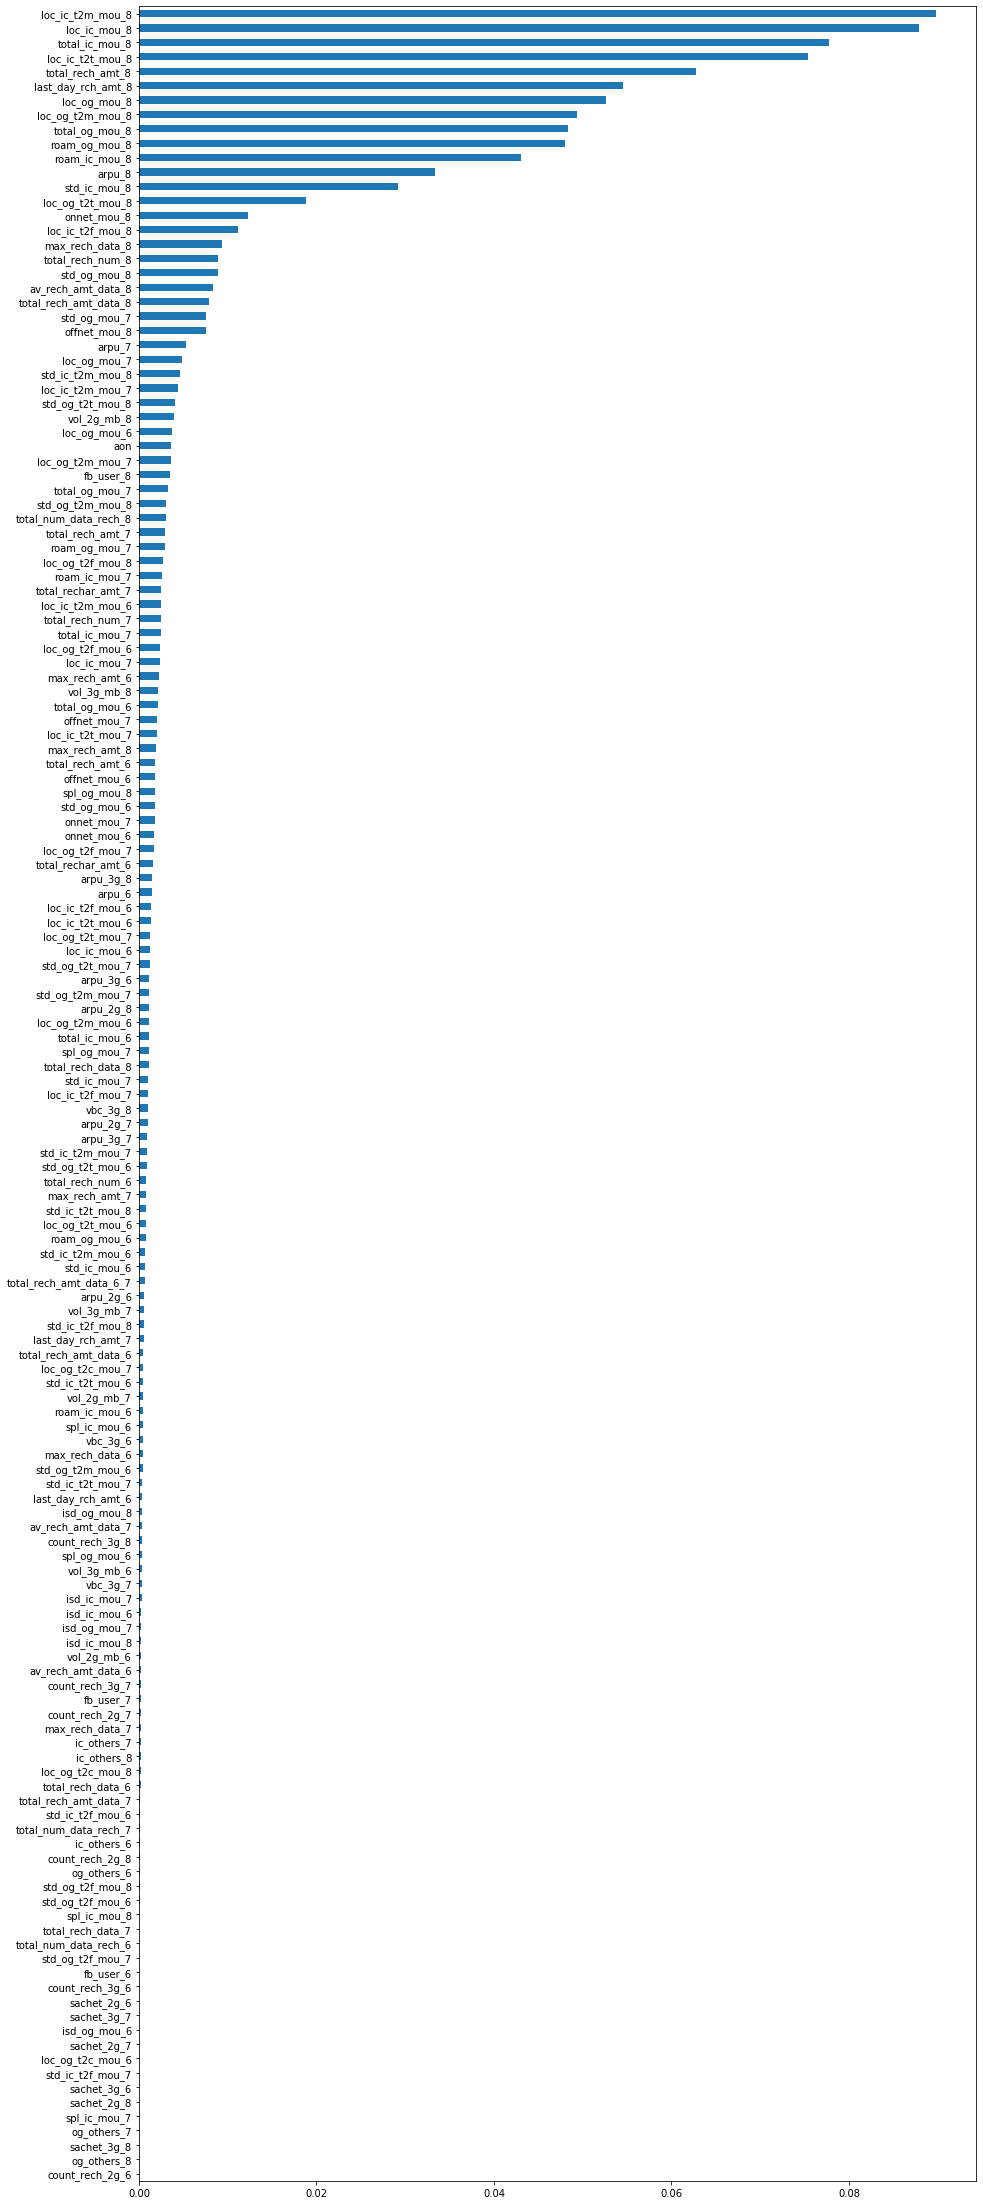

In [159]:
# Visualising the most important churn variables in descending order.
plt.figure(figsize=(15,40))
feat_importances = pd.Series(rf2.feature_importances_, index=X_train_scale_gen.columns)
feat_importances.nlargest(len(X_train_scale_gen.columns)).sort_values().plot(kind='barh', align='center')

##### Identified important predictor attributes which help the business understand indicators of churn are as follows in order:     

- loc_ic_t2m_mou_8   
- loc_ic_mou_8
- total_ic_mou_8 
- loc_ic_t2t_mou_8
- total_rech_amt_8
- total_og_mou_8 

- arpu_8

- loc_og_t2m_mou_8
- loc_og_mou_8
- loc_og_t2t_mou_8
- last_day_rch_amt_8
- roam_og_mou_8
- offnet_mou_8
- max_rech_amt_8
- roam_ic_mou_8
- std_ic_mou_8
- onnet_mou_8
- loc_ic_t2f_mou_8

As we can see, the features, ranked in order of importance, that has most impact on the churn rate is mostly from the 8th month which is the Action phase. 

### Strategies to manage customer churn

As the most impacting churn variables obtained is regarding the minutes of usage, we can concentrate on enhancing those features related to mou. 
- One way to do it is by connecting with the customers in order to understand what needs to be improvised to make their experience better.
- The tarrifs could be revisited. Check the market tarrifs running at present by the competitor network service providers. And if needed tweak the tarrifs accordingly in order to retain customers.
- Company could come up with better plans for different sections of the users.
- Also revisiting the roaming plans offered since a lot customers might be preferring other network providers when tarrifs for roaming calls are increased to a certain amount.
